<div style="border:solid Chocolate 2px; padding: 40px">

<b>Павел, привет!👋</b>

Меня зовут Ольга Бессолицына, тимлид, я буду проверять эту (как наверное и все) части твоего проекта. 

Пожалуйста, не удаляй мои комментарии, они будут особенно полезны для нашей работы в случае повторной проверки проекта. 

Ты можешь найти мои комментарии, обозначенные <font color='green'>зеленым</font>, <font color='gold'>желтым</font> и <font color='red'>красным</font> цветами, например:

<br/>

<div class="alert alert-success">
<h2> Комментарий тимлида <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> В случае, если решение на отдельном шаге является полностью правильным.
</div>

<br/>

<div class="alert alert-warning">
    <h2> Комментарий тимлида <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> В случае, когда решение на отдельном шаге станет еще лучше, если внести небольшие коррективы.
</div>


<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий тимлида <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b>
 В случае, когда решение на отдельном шаге требует существенной переработки и внесения правок. Напоминаю, что проект не может быть принят с первого раза, если ревью содержит комментарии, рекомендующие доработать шаги.
</div>

# Отток Клиентов Телеком компании

## Описание проекта

Оператор связи «Ниединогоразрыва.ком» хочет научиться прогнозировать отток клиентов. Если выяснится, что пользователь планирует уйти, ему будут предложены промокоды и специальные условия. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и договорах.  



***Описание услуг***  
Оператор предоставляет два основных типа услуг: 

1. Стационарную телефонную связь. Возможно подключение телефонного аппарата к нескольким линиям одновременно.
2. Интернет. Подключение может быть двух типов: через телефонную линию (DSL*,* от англ. *digital subscriber line*, «цифровая абонентская линия») или оптоволоконный кабель (*Fiber optic*).  

Также доступны такие услуги:

- Интернет-безопасность: антивирус (*DeviceProtection*) и блокировка небезопасных сайтов (*OnlineSecurity*);
- Выделенная линия технической поддержки (*TechSupport*);
- Облачное хранилище файлов для резервного копирования данных (*OnlineBackup*);
- Стриминговое телевидение (*StreamingTV*) и каталог фильмов (*StreamingMovies*).

За услуги клиенты могут платить каждый месяц или заключить договор на 1–2 года. Доступны различные способы расчёта и возможность получения электронного чека.

***Описание данных***

Данные состоят из файлов, полученных из разных источников:

- `contract.csv` — информация о договоре;
- `personal.csv` — персональные данные клиента;
- `internet.csv` — информация об интернет-услугах;
- `phone.csv` — информация об услугах телефонии.

Во всех файлах столбец `customerID` содержит код клиента.

Информация о договорах актуальна на 1 февраля 2020.

***Описание столбцов***  
  
* Customer ID - Уникальный идентификатор пользователя
* Gender - Половая принадлежность пользователя
* Begin Date - Дата начала пользования услугами.
* End Date - Дата окончания пользования услугами
* Type - Тип оплаты (ежемесячный, годовой и т.д.
* Paperless Billing - Факт выставления счета на электронную почту
* Payment Method - Способ оплаты
* Monthly Charges - Ежемесячные траты на услуги
* Total Charges - Всего потрачено на услуги
* Dependents - Наличие иждевенцев
* Senior Citizen - Наличие пенсионного статуса по возрасту
* Partner - Наличие супруга(и)
* Multiple Lines - Наличие возможности ведения параллельных линий во время звонка
* Internet Service - Тип подключения интернета (digital subscriber line (через телефонную линию) / Fiber optic(оптоволоконный кабель))
* Devise Protection - Наличие антивирусаа
* Online Security - Наличие услуги блокировки небезопасных сайтов
* Tech Support - Наличие выделенной линии технической поддержки
* Online Backup - Наличие облачного хранилища для резервного копирования данных
* Streaming TV - Стриминговое телевидение
* Streaming Movies - Каталог фильмов  
  
  
***Цель проекта***  
Построить модель для прогноза оттока клиентов. Разобраться в факторах и причинах прекращения пользования услугами компании  
  


<div class="alert alert-success">
<h2> Комментарий тимлида <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>
 Молодец, что не забываешь про заголовок и описание, это важно, так и самому удобнее работать, когда они всегда на виду, так и другим будет проще понять, что происходит в твоей тетради :)
</div>

## Загрузка и изучение данных

In [466]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score, roc_curve, precision_score, recall_score, f1_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
# from imblearn.over_sampling import SMOTENC

from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

import phik

pd.set_option("display.max_columns", None)
pd.set_option("display.max_colwidth", None)
warnings.filterwarnings("ignore")

In [467]:
try:
    personal = pd.read_csv("D:/practicum/datasets_for_projects/final_provider/personal.csv")
except:
    personal = pd.read_csv("/datasets/final_provider/personal.csv")
    
try:
    phone = pd.read_csv("D:/practicum/datasets_for_projects/final_provider/phone.csv")
except:
    phone = pd.read_csv("/datasets/final_provider/phone.csv")
    
try:
    internet = pd.read_csv("D:/practicum/datasets_for_projects/final_provider/internet.csv")
except:
    internet = pd.read_csv("/datasets/final_provider/internet.csv")
    
try:
    contract = pd.read_csv("D:/practicum/datasets_for_projects/final_provider/contract.csv")
except:
    contract = pd.read_csv("/datasets/final_provider/contract.csv")

In [468]:
print("\n____PERSONAL____\n")
personal.info()
display(personal.head())
personal.describe(include="all")


____PERSONAL____

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


,customerID,gender,SeniorCitizen,Partner,Dependents
count,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2
top,7590-VHVEG,Male,NaN,No,No
freq,1,3555,NaN,3641,4933
mean,NaN,NaN,0.162147,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN


In [469]:
personal.duplicated().sum()

0

### Вывод по таблице Personal

* В таблице 5 столбцов и 7043 строки
* Пропусков и дубликатов нет
* Все столбцы содержат бинрные категориальные переменные
* Столбец SeniorCitizen имеет целочисленный тип данных, в конечном итоге мы приведем все бинарные признаки к числовым значениям
* Названия столбцов в околоверблюжьем регистре

<div class="alert alert-success">
<h2> Комментарий тимлида <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>
хорошо

In [470]:
print("\n____PHONE____\n")
phone.info()
display(phone.head())
phone.describe()


____PHONE____

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


,customerID,MultipleLines
count,6361,6361
unique,6361,2
top,5575-GNVDE,No
freq,1,3390


In [471]:
phone.duplicated().sum()

0

In [472]:
phone['customerID']. isin (personal['customerID']). value_counts ()

True    6361
Name: customerID, dtype: int64

### Вывод по таблице Phone

* Таблица содержит меньше записей  чем предыдущая
* в предыдущей таблице присутствуют все уникальные идентификаторы пользователей
* регистр снова не в порядке
* помимо идентификатора присутствует один бинарный признак строкового типа
* пропусков и дубликатов нет

<div class="alert alert-success">
<h2> Комментарий тимлида <a class="tocSkip"> </h2>

<b>Все отлично!👍</b>


In [473]:
print("\n____INTERNET____\n")
internet.info()
display(internet.head())
internet.describe()


____INTERNET____

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
count,5517,5517,5517,5517,5517,5517,5517,5517
unique,5517,2,2,2,2,2,2,2
top,7590-VHVEG,Fiber optic,No,No,No,No,No,No
freq,1,3096,3498,3088,3095,3473,2810,2785


In [474]:
internet.duplicated().sum()

0

In [475]:
internet['customerID']. isin (personal['customerID']). value_counts ()

True    5517
Name: customerID, dtype: int64

### Вывод по таблице Internet

* 7 столбцов помимо идентификатора. все бинарные, строковые
* строк в таблице еще меньше
* все идентификаторы присутсвуют в большой таблице
* пропусков и дубликатов нет
* названия столбцов аналогично

<div class="alert alert-success">
<h2> Комментарий тимлида <a class="tocSkip"> </h2>

<b>Все отлично!👍</b>


In [476]:
print("\n____CONTRACT____\n")
contract.info()
display(contract.head(10))
contract.describe()


____CONTRACT____

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65
5,9305-CDSKC,2019-03-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,99.65,820.5
6,1452-KIOVK,2018-04-01,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4
7,6713-OKOMC,2019-04-01,No,Month-to-month,No,Mailed check,29.75,301.9
8,7892-POOKP,2017-07-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,104.80,3046.05
9,6388-TABGU,2014-12-01,No,One year,No,Bank transfer (automatic),56.15,3487.95


,MonthlyCharges
count,7043.000000
mean,64.761692
std,30.090047
min,18.250000
25%,35.500000
50%,70.350000
75%,89.850000
max,118.750000


In [477]:
contract.duplicated().sum()

0

In [478]:
contract['customerID']. isin (personal['customerID']). value_counts ()

True    7043
Name: customerID, dtype: int64

### Вывод по таблице Contract

* строк столько же, сколько и в первой таблице, все идентификаторы совпадают
* два столбца с датами и один с числами в строковом формате
* один числовой столбец с неприрывной величиной в нужном формате, остальные категориальные
* признак EndDate имеет помимо дат значение No. Из него сгенерируем целевойпризнак (ушедшие/оставшиеся клиенты)
* Остальное аналогично с прочими таблицами

<div class="alert alert-success">
<h2> Комментарий тимлида <a class="tocSkip"> </h2>

<b>Все отлично!👍</b>


## План!

**1)** Объединить таблицы  
**2)** Привести названия столбцов к змеиному регистру  
**3)** Сгенерировать целевой признак на основе $End\ Date$  
**4)** Привести данные в столбцах с датами к типу $datetime$  
**5)** Привести $Total\ Charges$ к типу $float$  
**6)** Сгенерировать признаки длительности пользования услугами $Duration$ в годах и месяцах при помощи дат  
**7)** Заполнить пропуски в столбцах с телефонными и интернет услугами  
**8)** Удалить столбец $Customer\ ID$ как не несущий полезной информации  
**9)** Удалить столбцы $Begin\ Date$ и $End\ Date$ для предотвращения утечки целевого признака при обучении  
**10)** Сгенерировать пару признаков на основе сочетаний и количества интернет услуг  
**11)** Отделить целевой признак от остальных (разбить выборку на $features$ и $target$)  
**12)** Закодировать признаки двумя способами: $One\ Hot\ Encoding$ и $Ordinal Encoding$  
**13)** Разбить закодированные признаки на тренировочную $train$ и тестовую $test$ выборки  
**14)** Произвести кросс-валидацию с подбором гиперпараметров при помощи $GridSearchCV$ для разных моделей  
**15)** Повторить то же действие, применив $SMOTENC$ для балансировки классов в несбалансированных признаках тренировочных данных  
**16)** Выбрать лучшую модель посмотреть на вклад признаков в работу модели припомощи атрибута $feature\_importances\_$  
**17)** Удалить лишние признаки при наличии таковых  
**18)** Проверить не упало и качество  
**19)** Обучить модель на общем наборе тренировочных данных, сделать предсказания на тестовой выборке, посчитать итоговый $ROC-AUC$  
**20)** Пораскинуть мозгами и навтыкать везде красивых графиков   
**21)** Отправить проект на проверку   

<div class="alert alert-warning">
    <h2> Комментарий тимлида <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> хорошо, принимается. Только  кодирование категориальных переменных корректно проводить после разбиения на подвыборки, в реальности возможна ситуация, когда модель столкнётся с новой категорией, например, заказчик ввел новый тип интернет-соединения, по спутнику :) Модель должна быть готова к таким раскладам. В нашей задаче и с выбранным типом кодирования это не так критично, но, всё-таки, обрати на этот момент внимание.
        
То есть сначала рзбиваем на тест и трейн, а уже потом отдельно каждую выборку кодируем.

P.S.: Если для кодирования используется get_dummies, то стоит после кодирования проверять порядок и наличие всех колонок в обучающей и тестовой выборке(train.columns == test.columns), чтобы избежать проверки можно использовать OneHotEncoder. В этой задаче это не показательно, но лучше сразу сделать правильно

## Вопросы

1. Данные в таблице phone означают, что некоторые могут пользоваться несколькими линиями (Yes) или одной (No), а отсутствие данных говорит об отсутствии подключения?
2. По интернету аналогично. Отсутствие данных означает отсутствие подключения?

<div class="alert alert-success">
<h2> Комментарий тимлида <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>
1) Если клиент есть в phone, значит у него есть услуга телефонной связи. Если стоит MultipleLines, то он дополнительно использует опцию параллельных звонков.
    
2) Если клиента нет в internet, то он не использует такие услуги (видимо он пользуется только телефонией)

<div class="alert alert-success">
<h2> Комментарий тимлида <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> можно приступать к коду, но по кодированию учти пожалуйста мой комментарии. 

## Предобработка и анализ

<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий тимлида<a class="tocSkip"></h2>

    
<b>На доработку🤔:</b> все импорты нужно поднять в начало блокнота

<div style="border:solid purple 3px; padding: 2px">
<div class="alert alert-info" markdown="1">

>  <strong><span style="color:purple">Я сделяль</span></strong>

</div>

<div class="alert alert-success">
<h2> Комментарий тимлида 2<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> принято:)

In [479]:
# Объединяем таблицы
df = personal.merge(contract, how="left").merge(phone, how="left").merge(internet, how="left")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,Female,0,Yes,No,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,NaN,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,Male,0,No,No,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,Male,0,No,No,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,Male,0,No,No,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,NaN,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Female,0,No,No,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,No,Fiber optic,No,No,No,No,No,No


<div class="alert alert-success">
<h2> Комментарий тимлида <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> хорошо, данные объединены верно

In [15]:
def to_snake(df):
    """Функция приводит названия 
    столбцов к змеиному регистру"""
    new_names = []
    for col in df.columns:
        name = ""
        for i in range(len(col)):
            if col[i-1].isupper():
                name +=(col[i].lower())
            elif col[i].isupper():
                name += ("_" + col[i].lower())
            else:
                name += col[i]
        new_names.append(name.lstrip("_"))
    return new_names

In [16]:
# наводим порядок в названиях столбцов
df.columns = to_snake(df)
            

In [17]:
df.columns

Index(['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
       'begin_date', 'end_date', 'type', 'paperless_billing', 'payment_method',
       'monthly_charges', 'total_charges', 'multiple_lines',
       'internet_service', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies'],
      dtype='object')

<div class="alert alert-success">
<h2> Комментарий тимлида <a class="tocSkip"> </h2>

<b>Все отлично!👍</b>

In [18]:
# Переименуем столбец type в payment_type чтобы оно выражало суть
df = df.rename({"type":'payment_type'}, axis=1)
df.columns

Index(['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
       'begin_date', 'end_date', 'payment_type', 'paperless_billing',
       'payment_method', 'monthly_charges', 'total_charges', 'multiple_lines',
       'internet_service', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies'],
      dtype='object')

Еще раз взглянем на форматы данных и пропуски

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7043 non-null   object 
 1   gender             7043 non-null   object 
 2   senior_citizen     7043 non-null   int64  
 3   partner            7043 non-null   object 
 4   dependents         7043 non-null   object 
 5   begin_date         7043 non-null   object 
 6   end_date           7043 non-null   object 
 7   payment_type       7043 non-null   object 
 8   paperless_billing  7043 non-null   object 
 9   payment_method     7043 non-null   object 
 10  monthly_charges    7043 non-null   float64
 11  total_charges      7043 non-null   object 
 12  multiple_lines     6361 non-null   object 
 13  internet_service   5517 non-null   object 
 14  online_security    5517 non-null   object 
 15  online_backup      5517 non-null   object 
 16  device_protection  5517 

Сгенерируем целевой признак из признака с датой ухода. Положительным классом будут ушедшие клиенты

In [20]:
# генерируем целевой признак
df["exited"] = (df["end_date"] != "No") * 1

<div class="alert alert-success">
<h2> Комментарий тимлида <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> таргет выделен верно

In [21]:
# приводим даты к типу datetime
df["begin_date"] = pd.to_datetime(df["begin_date"], format = "%Y-%m")
df.loc[df["end_date"] == "No", "end_date"] = "2020-02-01"
df["end_date"] = pd.to_datetime(df["end_date"], format = "%Y-%m")

<div class="alert alert-success">
<h2> Комментарий тимлида <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> согласна, заполнение датой среза

Попробуем привести столбец total_charges к типу числа с плавающей точкой

In [22]:
df["total_charges"] = pd.to_numeric(df["total_charges"], errors="ignore")
df["total_charges"].dtype

dtype('O')

Не получилось, значит в данных есть не числовые значения. Найдем их

In [23]:
result = []
for i in df["total_charges"]:
    matches = re.findall(r"[^\d.]", i )
    if len(matches) > 0:
        result.append(i)
result

[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']

Посмотрим на строки с пробелами вместо значений

In [24]:
df[df["total_charges"] == " "]

,customer_id,gender,senior_citizen,partner,dependents,begin_date,end_date,payment_type,paperless_billing,payment_method,monthly_charges,total_charges,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,exited
488,4472-LVYGI,Female,0,Yes,Yes,2020-02-01,2020-02-01,Two year,Yes,Bank transfer (automatic),52.55,,NaN,DSL,Yes,No,Yes,Yes,Yes,No,0
753,3115-CZMZD,Male,0,No,Yes,2020-02-01,2020-02-01,Two year,No,Mailed check,20.25,,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
936,5709-LVOEQ,Female,0,Yes,Yes,2020-02-01,2020-02-01,Two year,No,Mailed check,80.85,,No,DSL,Yes,Yes,Yes,No,Yes,Yes,0
1082,4367-NUYAO,Male,0,Yes,Yes,2020-02-01,2020-02-01,Two year,No,Mailed check,25.75,,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1340,1371-DWPAZ,Female,0,Yes,Yes,2020-02-01,2020-02-01,Two year,No,Credit card (automatic),56.05,,NaN,DSL,Yes,Yes,Yes,Yes,Yes,No,0
3331,7644-OMVMY,Male,0,Yes,Yes,2020-02-01,2020-02-01,Two year,No,Mailed check,19.85,,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3826,3213-VVOLG,Male,0,Yes,Yes,2020-02-01,2020-02-01,Two year,No,Mailed check,25.35,,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4380,2520-SGTTA,Female,0,Yes,Yes,2020-02-01,2020-02-01,Two year,No,Mailed check,20.00,,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
5218,2923-ARZLG,Male,0,Yes,Yes,2020-02-01,2020-02-01,One year,Yes,Mailed check,19.70,,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
6670,4075-WKNIU,Female,0,Yes,Yes,2020-02-01,2020-02-01,Two year,No,Mailed check,73.35,,Yes,DSL,No,Yes,Yes,Yes,Yes,No,0


Очевидно, пропуски в столбце с суммарными затратами связаны с тем, что клиенты пришли в текущем месяце.  
Заполним пропуски помесячной платой

<div class="alert alert-success">
<h2> Комментарий тимлида <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> хорошее решение, согласна

In [25]:
# заполняем
df.loc[df["total_charges"] == " ", "total_charges"] = df["monthly_charges"]

In [26]:
# меняем тип данных
df["total_charges"] = pd.to_numeric(df["total_charges"], errors="ignore")
df["total_charges"].dtype

dtype('float64')

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        7043 non-null   object        
 1   gender             7043 non-null   object        
 2   senior_citizen     7043 non-null   int64         
 3   partner            7043 non-null   object        
 4   dependents         7043 non-null   object        
 5   begin_date         7043 non-null   datetime64[ns]
 6   end_date           7043 non-null   datetime64[ns]
 7   payment_type       7043 non-null   object        
 8   paperless_billing  7043 non-null   object        
 9   payment_method     7043 non-null   object        
 10  monthly_charges    7043 non-null   float64       
 11  total_charges      7043 non-null   float64       
 12  multiple_lines     6361 non-null   object        
 13  internet_service   5517 non-null   object        
 14  online_s

все типы данных приведены к нужному формату.

Сгенерируем признаки с полным количеством лет и месяцев пользования услугами компании

In [28]:
df["dur_months"] = (df["end_date"].dt.year - df["begin_date"].dt.year)*12 + df["end_date"].dt.month - df["begin_date"].dt.month
# df["dur_years"] = df["end_date"].dt.year - df["begin_date"].dt.year
# display(df["dur_years"].value_counts())
# df.loc[df["end_date"].dt.month < df["begin_date"].dt.month, "dur_years"] = df["dur_years"] - 1
# df["dur_years"].value_counts()
df["dur_years"] = df["dur_months"] // 12

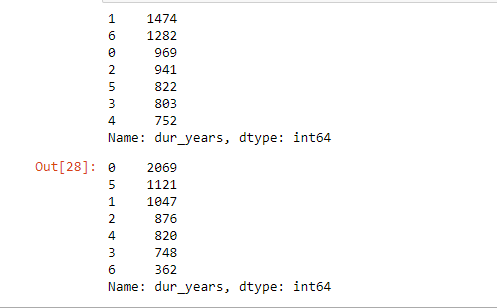

<div class="alert alert-success">
<h2> Комментарий тимлида <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> есть новые признаки

In [29]:
# смотрим на распределение пропусков
df.isna().sum()

customer_id             0
gender                  0
senior_citizen          0
partner                 0
dependents              0
begin_date              0
end_date                0
payment_type            0
paperless_billing       0
payment_method          0
monthly_charges         0
total_charges           0
multiple_lines        682
internet_service     1526
online_security      1526
online_backup        1526
device_protection    1526
tech_support         1526
streaming_tv         1526
streaming_movies     1526
exited                  0
dur_months              0
dur_years               0
dtype: int64

Заполним все пропуски в столбцах связанных с интернет услугами нулями, а так же заменим Yes на единицы, а No на нули

In [30]:
internet = ["online_security", "online_backup", "device_protection", "tech_support", "streaming_tv", "streaming_movies"]
df[internet] = (df[internet] == "Yes") * 1

<div class="alert alert-success">
<h2> Комментарий тимлида <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> хорошо

In [31]:
df.isna().sum()

customer_id             0
gender                  0
senior_citizen          0
partner                 0
dependents              0
begin_date              0
end_date                0
payment_type            0
paperless_billing       0
payment_method          0
monthly_charges         0
total_charges           0
multiple_lines        682
internet_service     1526
online_security         0
online_backup           0
device_protection       0
tech_support            0
streaming_tv            0
streaming_movies        0
exited                  0
dur_months              0
dur_years               0
dtype: int64

In [32]:
# смотрим какие есть значения
df["internet_service"].value_counts(dropna=False)

Fiber optic    3096
DSL            2421
NaN            1526
Name: internet_service, dtype: int64

Осталось 2 столбца. Способ интернет подключения и наличие/отсутствие нескольких телефонных линий.  
Так как пропуски говорят об отсутствии подключения, в столбце internet_service заполним их новым No

In [33]:
df["internet_service"] = df["internet_service"].fillna("No")

<div class="alert alert-success">
<h2> Комментарий тимлида <a class="tocSkip"> </h2>

<b>Все отлично!👍</b> 

In [34]:
# смотрим значения 
df["multiple_lines"].value_counts(dropna=False)

No     3390
Yes    2971
NaN     682
Name: multiple_lines, dtype: int64

заменим значения в столбце multiple_lines, чтобы добавить третье значение. Yes на Multiple, No на One, и заполним пропуски значением No

In [35]:
df["multiple_lines"] = df["multiple_lines"].replace({"Yes" : "Multiple", "No" : "One"}).fillna("No")
df["multiple_lines"].head(10)

0          No
1         One
2         One
3          No
4         One
5    Multiple
6    Multiple
7          No
8    Multiple
9         One
Name: multiple_lines, dtype: object

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        7043 non-null   object        
 1   gender             7043 non-null   object        
 2   senior_citizen     7043 non-null   int64         
 3   partner            7043 non-null   object        
 4   dependents         7043 non-null   object        
 5   begin_date         7043 non-null   datetime64[ns]
 6   end_date           7043 non-null   datetime64[ns]
 7   payment_type       7043 non-null   object        
 8   paperless_billing  7043 non-null   object        
 9   payment_method     7043 non-null   object        
 10  monthly_charges    7043 non-null   float64       
 11  total_charges      7043 non-null   float64       
 12  multiple_lines     7043 non-null   object        
 13  internet_service   7043 non-null   object        
 14  online_s

Пропуски заполнены. Осталось избавиться от неинформативных столбцов и столбцов, которые могут спровоцировать утечку целевого признака

In [37]:
# удаляем
df = df.drop(["customer_id", "begin_date", "end_date"], axis=1)

<div class="alert alert-success">
<h2> Комментарий тимлида <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> согласна

Создадим еще 2 переменные:
* наличие/отсутствие подключения интернета, ибо тип подключения может быть и не важен, а наличие - более важный признак
* и что-то вроде рейтинга активности использования услуг. каждая из интернет услуг будет единицей, наличие интернета - единица, а телефонное подключение сделаем в виде рейтинга. 0 - отсутствие, 1 - одна линия, 2 - несколько линий. и посчитаем сумму

In [38]:
df["phone"] = df["multiple_lines"].replace({"Multiple" : 2, "One" : 1, "No" : 0})
df["internet"] = (df["internet_service"] != "No") * 1
df["num_of_services"] = (
    df["phone"]
    + df["internet"]
    + df["online_security"] 
    + df["online_backup"] 
    + df["device_protection"] 
    + df["tech_support"] 
    + df["streaming_tv"] 
    + df["streaming_movies"]
)


df = df.drop("phone", axis=1)
df.head()

,gender,senior_citizen,partner,dependents,payment_type,paperless_billing,payment_method,monthly_charges,total_charges,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,exited,dur_months,dur_years,internet,num_of_services
0,Female,0,Yes,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,DSL,0,1,0,0,0,0,0,1,0,1,2
1,Male,0,No,No,One year,No,Mailed check,56.95,1889.50,One,DSL,1,0,1,0,0,0,0,34,2,1,4
2,Male,0,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,One,DSL,1,1,0,0,0,0,1,2,0,1,4
3,Male,0,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,DSL,1,0,1,1,0,0,0,45,3,1,4
4,Female,0,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,One,Fiber optic,0,0,0,0,0,0,1,2,0,1,2


<div class="alert alert-success">
<h2> Комментарий тимлида <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> хорошо, инетересно будет посмотреть значимость признаков в финальной модели

отделим целевой признак

In [39]:
target = df["exited"]
features = df.drop("exited", axis=1)

In [40]:
# создаем списки с названиями категориальных и количественных признаков
categorical = ["gender", 
               "senior_citizen",
               "partner", 
               "dependents", 
               "payment_type", 
               "paperless_billing", 
               "payment_method", 
               "multiple_lines", 
               "internet_service",
               "online_security", 
               "online_backup", 
               "device_protection", 
               "tech_support", 
               "streaming_tv", 
               "streaming_movies",
               "internet"
              ]
numeric = ["monthly_charges", 
           "total_charges", 
           "dur_months", 
           "dur_years", 
           "num_of_services"
          ]

Упоряядочим колонки. сначала категориальные, потом количественные

In [41]:
features = features[categorical+numeric]
features.head()

,gender,senior_citizen,partner,dependents,payment_type,paperless_billing,payment_method,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,internet,monthly_charges,total_charges,dur_months,dur_years,num_of_services
0,Female,0,Yes,No,Month-to-month,Yes,Electronic check,No,DSL,0,1,0,0,0,0,1,29.85,29.85,1,0,2
1,Male,0,No,No,One year,No,Mailed check,One,DSL,1,0,1,0,0,0,1,56.95,1889.50,34,2,4
2,Male,0,No,No,Month-to-month,Yes,Mailed check,One,DSL,1,1,0,0,0,0,1,53.85,108.15,2,0,4
3,Male,0,No,No,One year,No,Bank transfer (automatic),No,DSL,1,0,1,1,0,0,1,42.30,1840.75,45,3,4
4,Female,0,No,No,Month-to-month,Yes,Electronic check,One,Fiber optic,0,0,0,0,0,0,1,70.70,151.65,2,0,2


In [42]:
def dist_visualizer(cols):
    """Функция принимает на вход список названий столбцов и 
    визуализирует распределение каждого признака и распределение 
    его же по классам целевого признака"""
    for col in cols:
        if col in categorical:
            fig = plt.figure(figsize=(13,5))
            plt.suptitle(col, x=0.45, y=1.1, size=31)
            if len(df[col].unique()) > 2:
                fig.add_subplot(1, 2, 1)
                if len(df[col].unique()) > 3:
                    ax = sns.countplot(data=df, x=col, order=df[col].unique())
                    ax.set_xticklabels(ax.get_xticklabels(),rotation = 7)
                    for c in ax.containers:
                        labels = [f'{h/df.exited.count()*100:0.1f}%' if (h := v.get_height()) > 0 else '' for v in c]
                        ax.bar_label(c, labels=labels, label_type='edge')
            else:
                fig = plt.figure(figsize=(13,4))
                plt.suptitle(col, x=0.45, y=1.1, size=26)
                fig.add_subplot(1, 3, 1)
            ax = sns.countplot(data=df, x=col, order=df[col].unique())
            for c in ax.containers:
                labels = [f'{h/df.exited.count()*100:0.1f}%' if (h := v.get_height()) > 0 else '' for v in c]
                ax.bar_label(c, labels=labels, label_type='edge')
            fig.add_subplot(1, 2, 2)
            if len(df[col].unique()) > 3:
                ax = sns.countplot(data=df, x=col, hue='exited', order=df[col].unique())
                ax.set_xticklabels(ax.get_xticklabels(),rotation = 7)
                for c in ax.containers:
                    labels = [f'{h/df.exited.count()*100:0.1f}%' if (h := v.get_height()) > 0 else '' for v in c]
                    ax.bar_label(c, labels=labels, label_type='edge')
            else:
                ax = sns.countplot(data=df, x=col, hue='exited', order=df[col].unique())
                for c in ax.containers:
                    labels = [f'{h/df.exited.count()*100:0.1f}%' if (h := v.get_height()) > 0 else '' for v in c]
                    ax.bar_label(c, labels=labels, label_type='edge')
            plt.tight_layout()
        else:
            bins = 10
            fig = plt.figure(figsize=(13,4))
            plt.suptitle(col, x=0.45, y=1, size=22)
            if len(df[col].unique()) < 10:
                bins = len(df[col].unique())
            fig.add_subplot(1, 3, 1)
            sns.barplot(data=df, x="exited", y=col)
            fig.add_subplot(1, 2, 2)
            sns.histplot(data=df, x=col, bins=bins)
    plt.show()

<Figure size 1300x500 with 0 Axes>

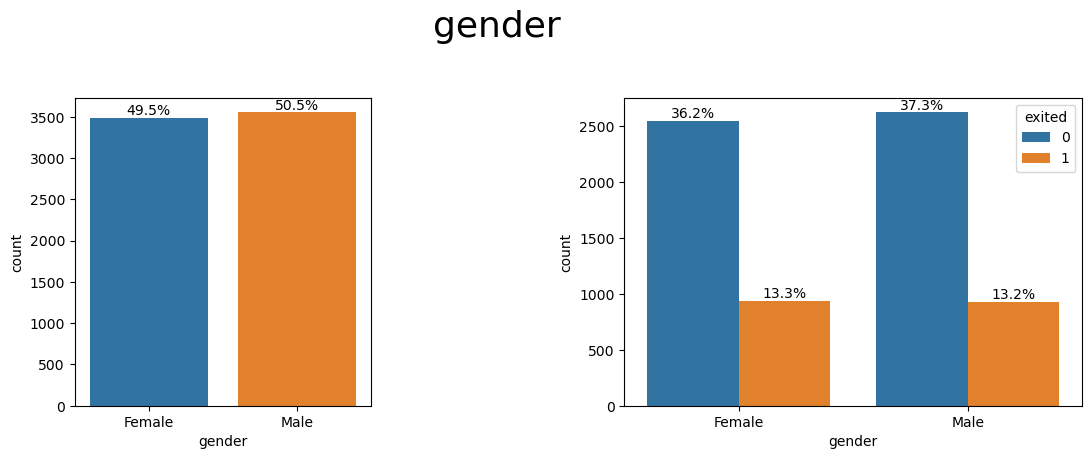

<Figure size 1300x500 with 0 Axes>

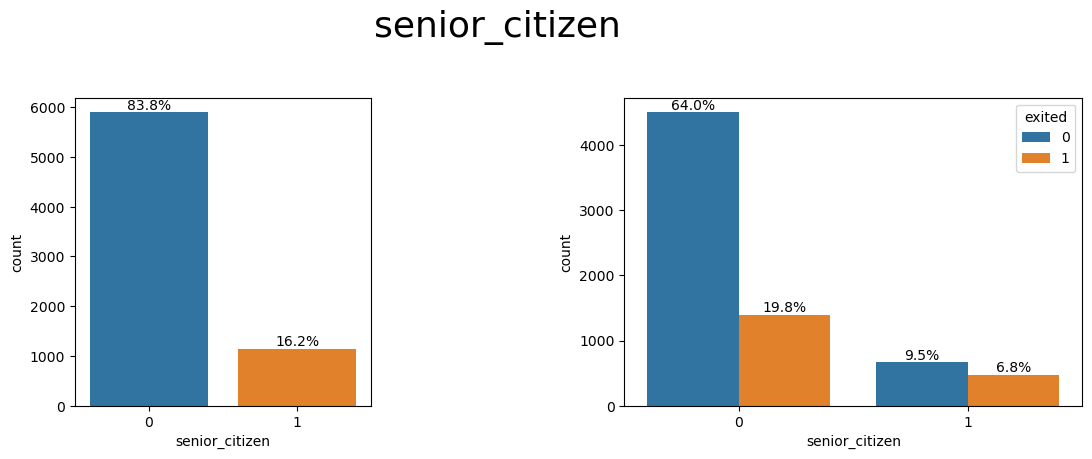

<Figure size 1300x500 with 0 Axes>

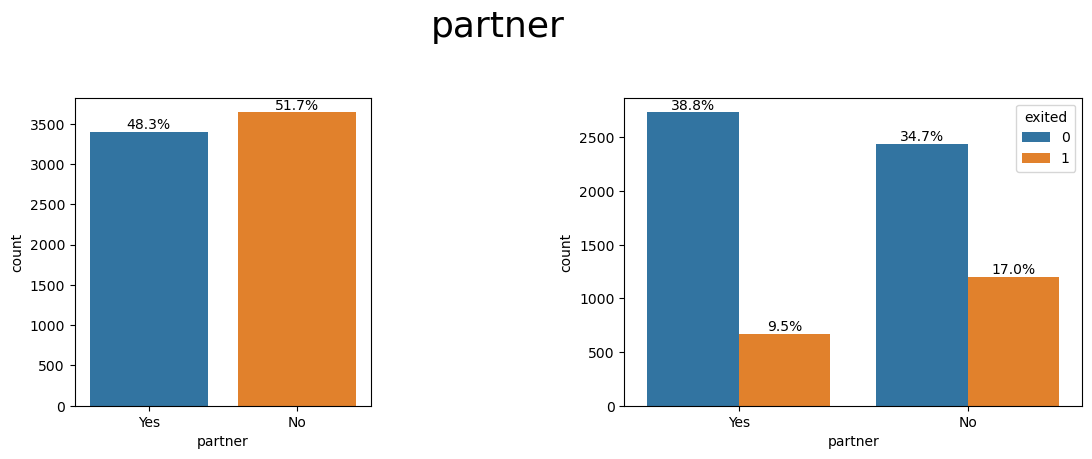

<Figure size 1300x500 with 0 Axes>

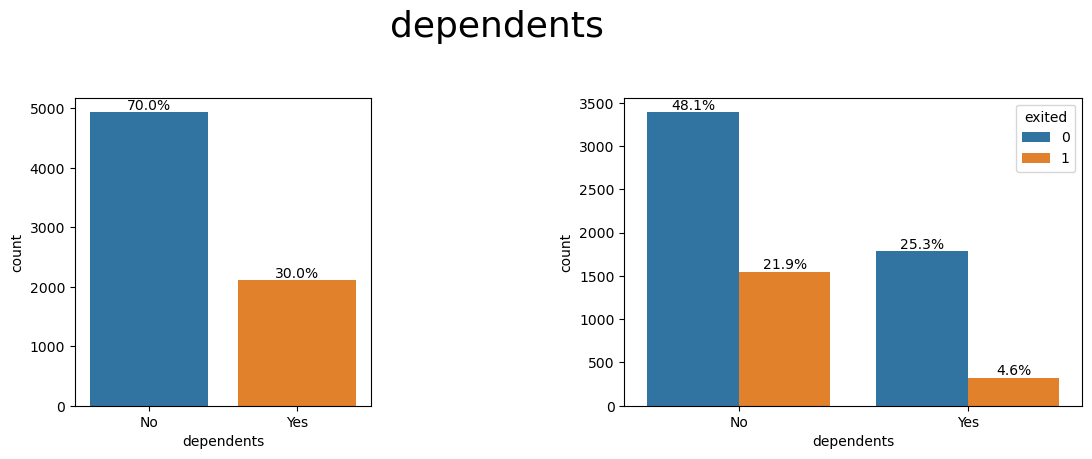

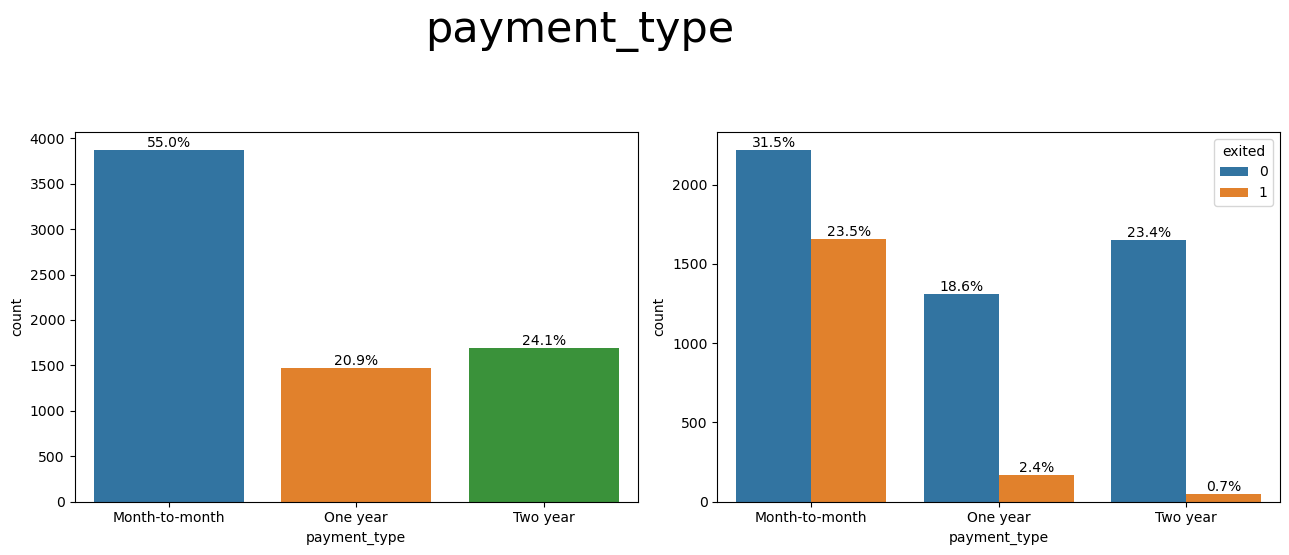

<Figure size 1300x500 with 0 Axes>

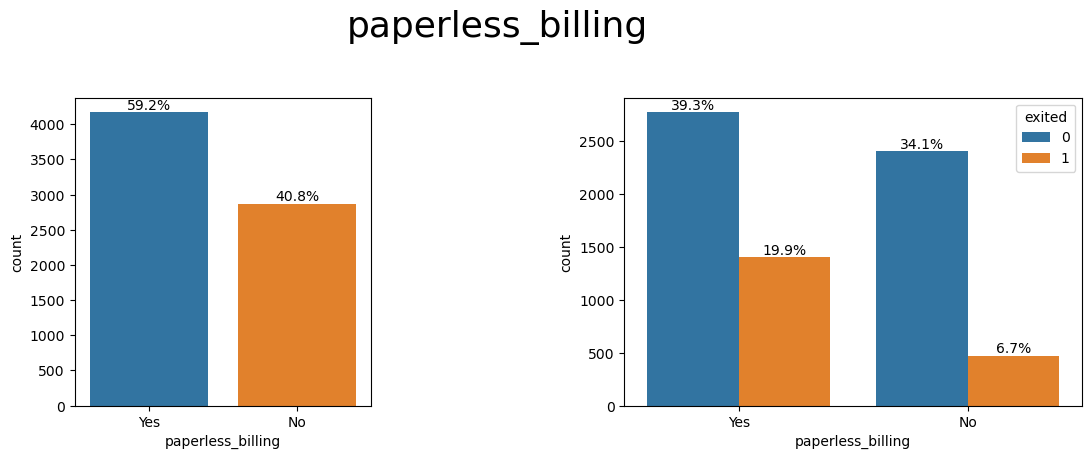

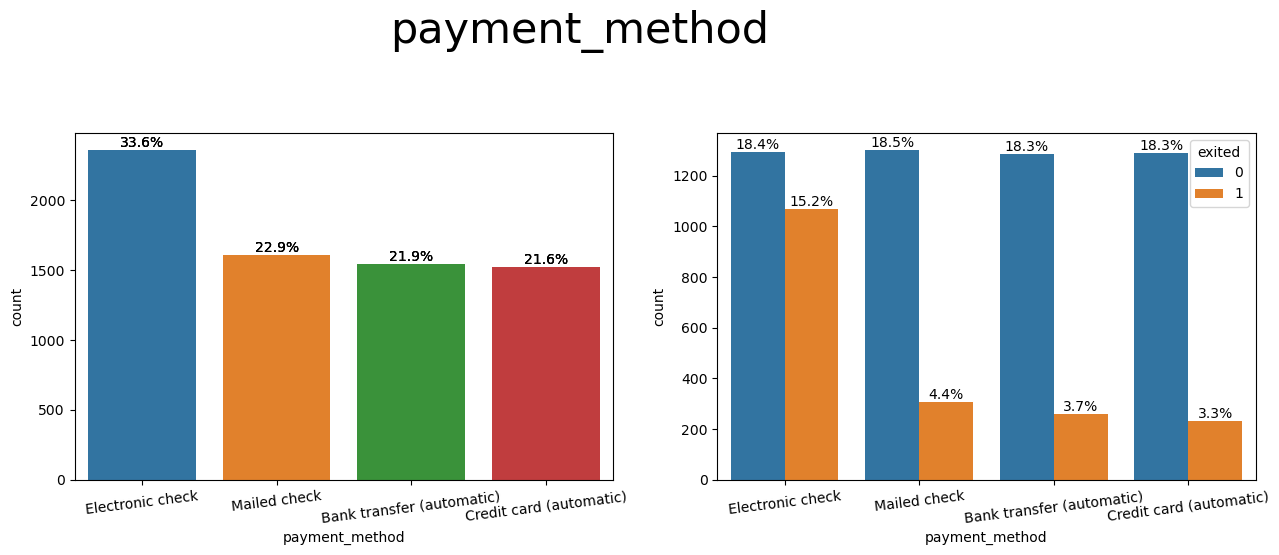

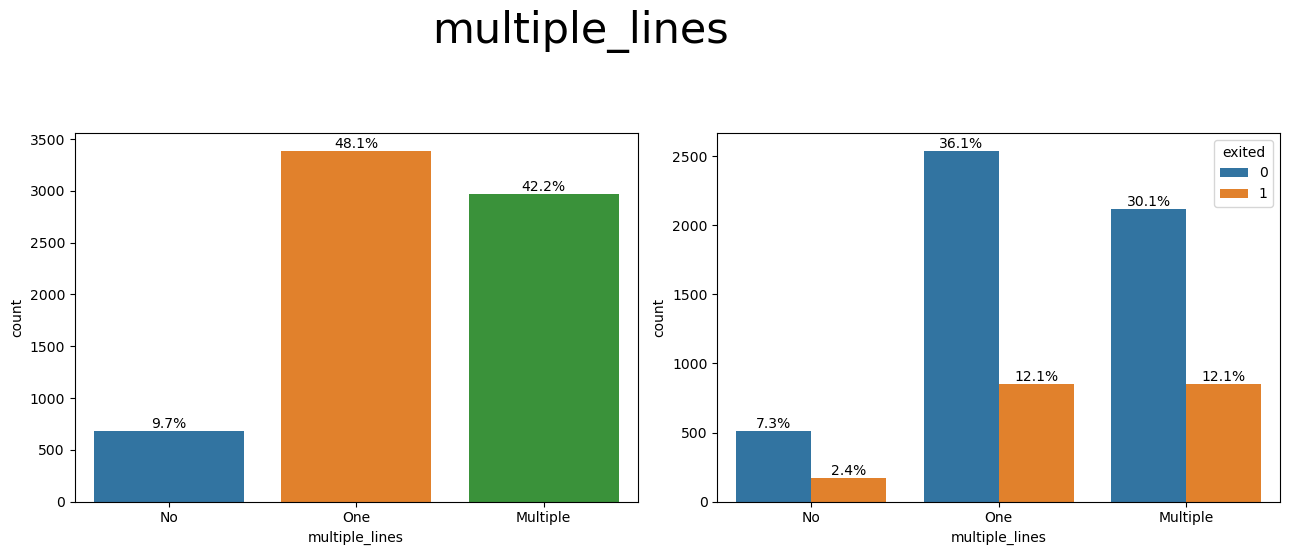

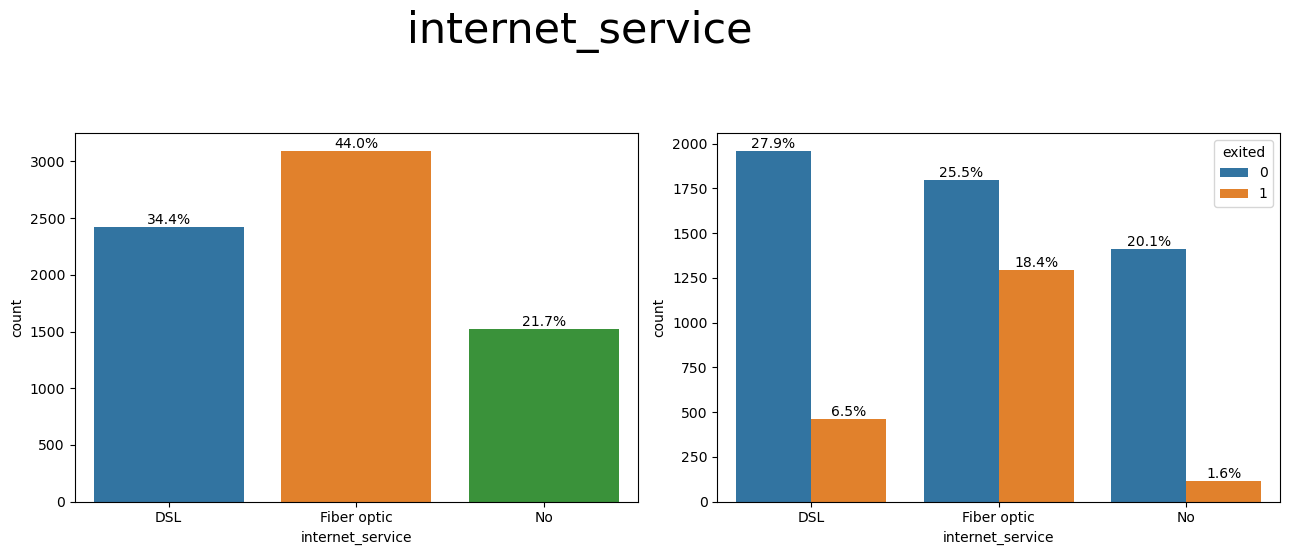

<Figure size 1300x500 with 0 Axes>

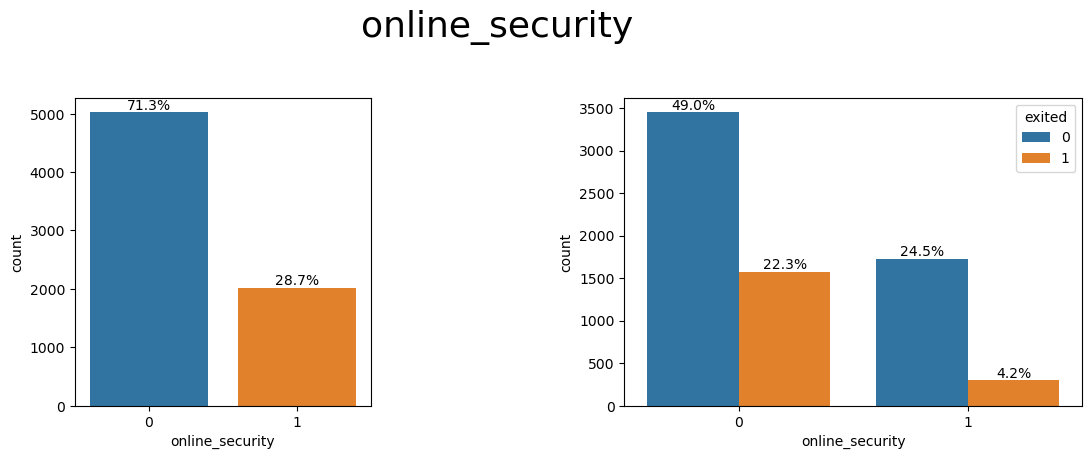

<Figure size 1300x500 with 0 Axes>

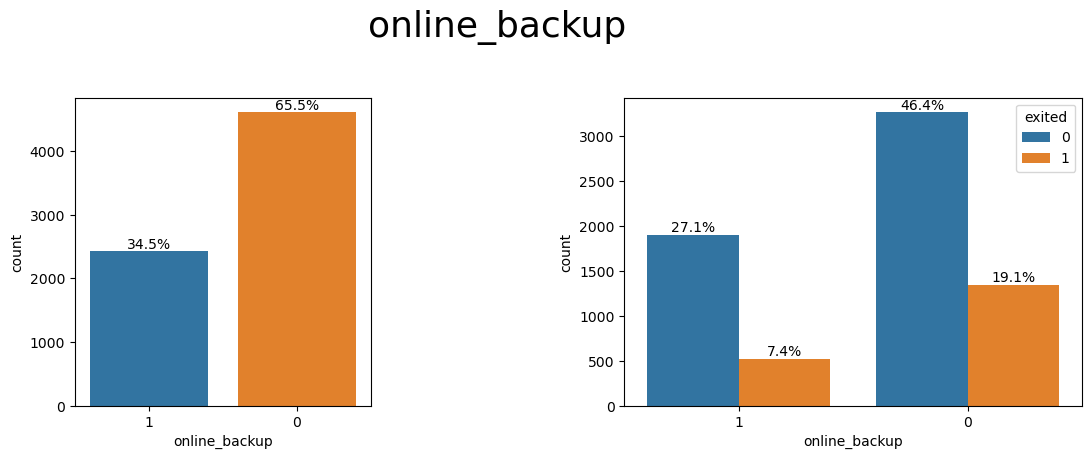

<Figure size 1300x500 with 0 Axes>

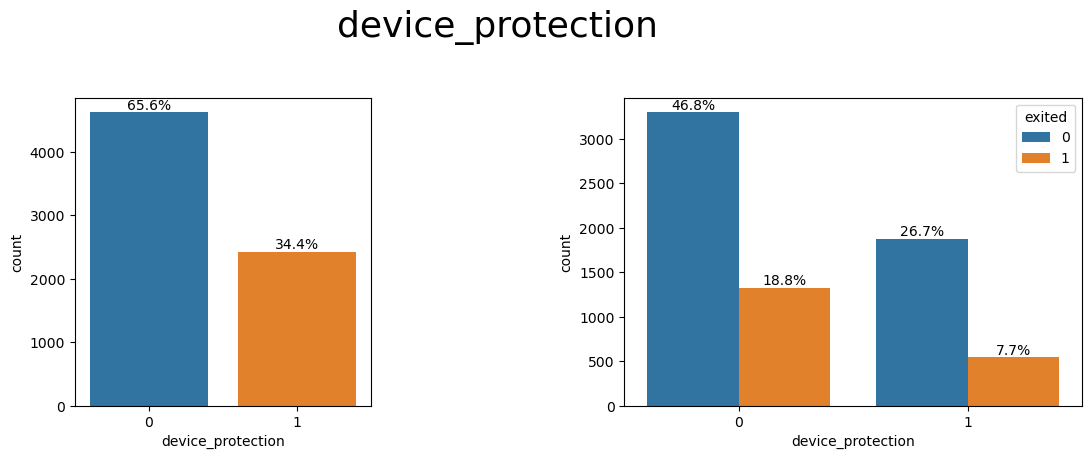

<Figure size 1300x500 with 0 Axes>

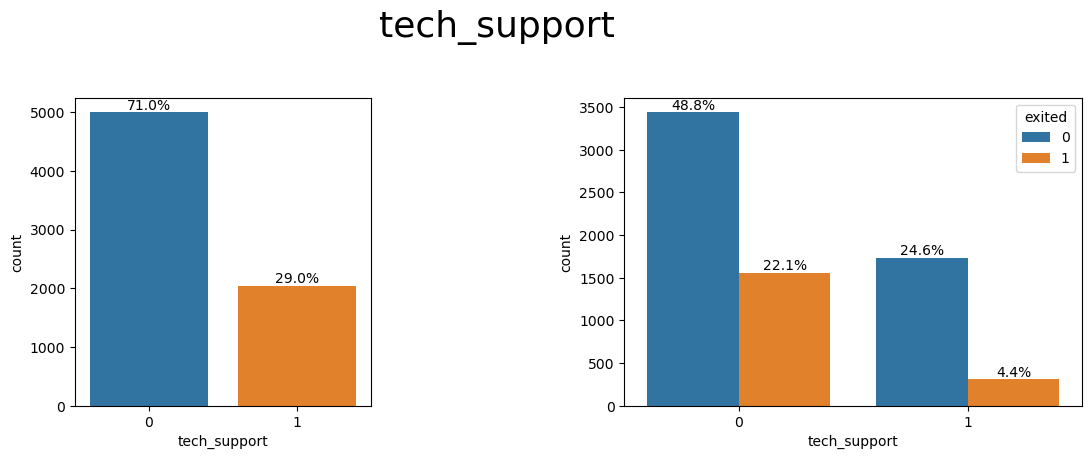

<Figure size 1300x500 with 0 Axes>

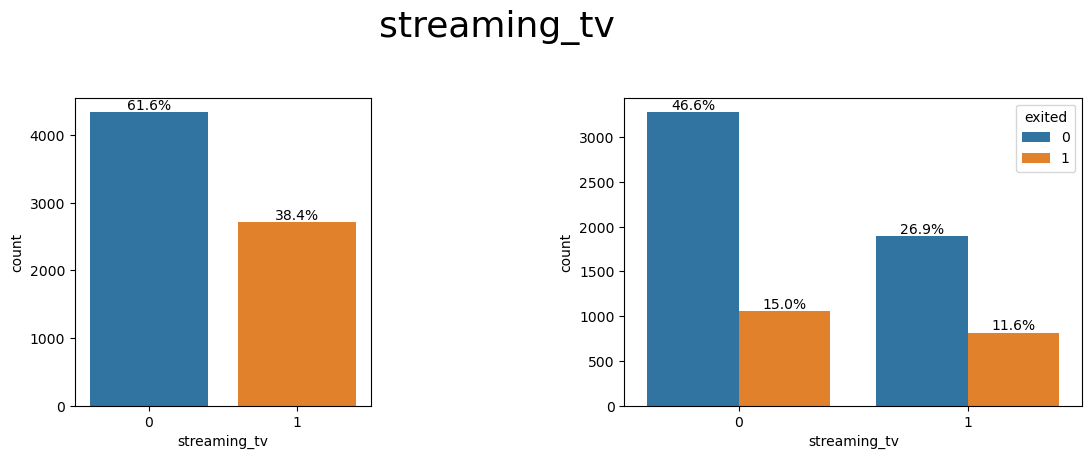

<Figure size 1300x500 with 0 Axes>

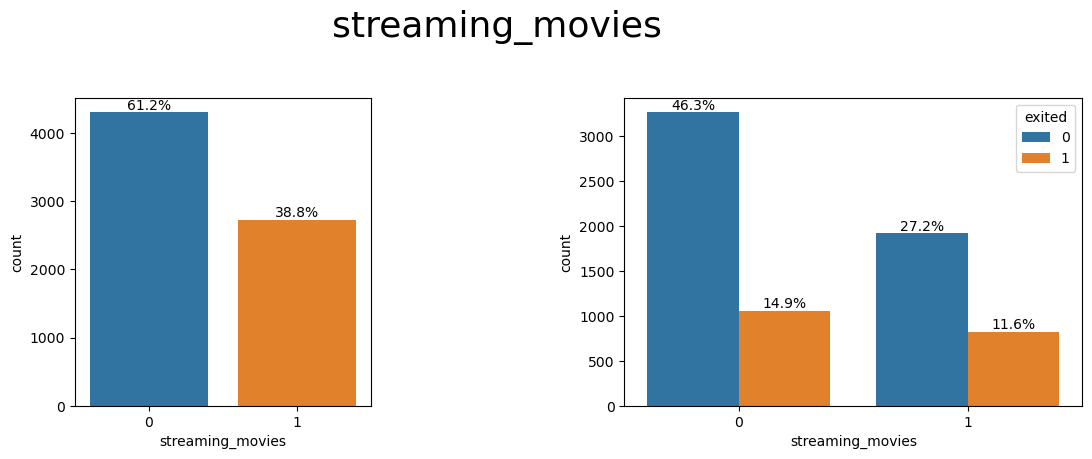

<Figure size 1300x500 with 0 Axes>

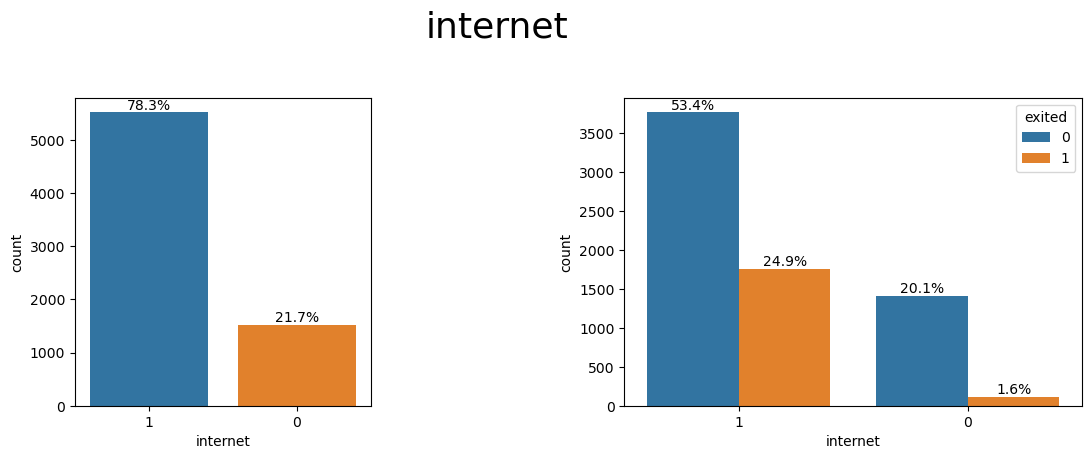

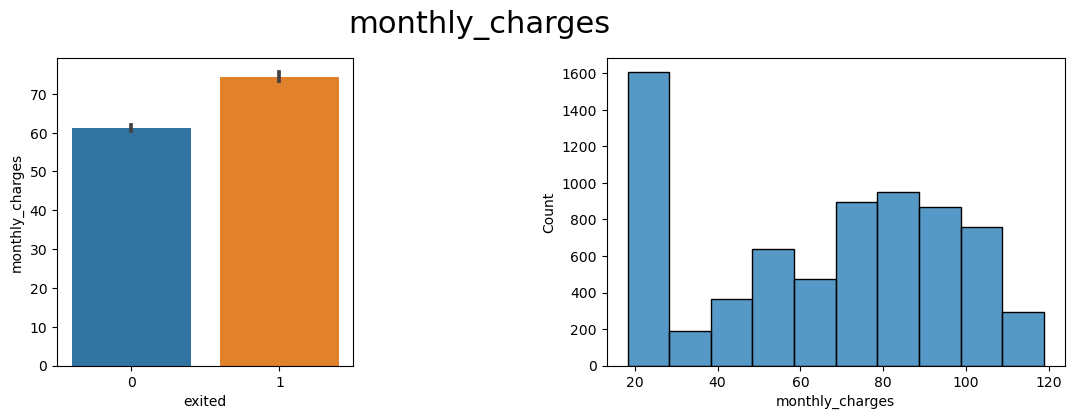

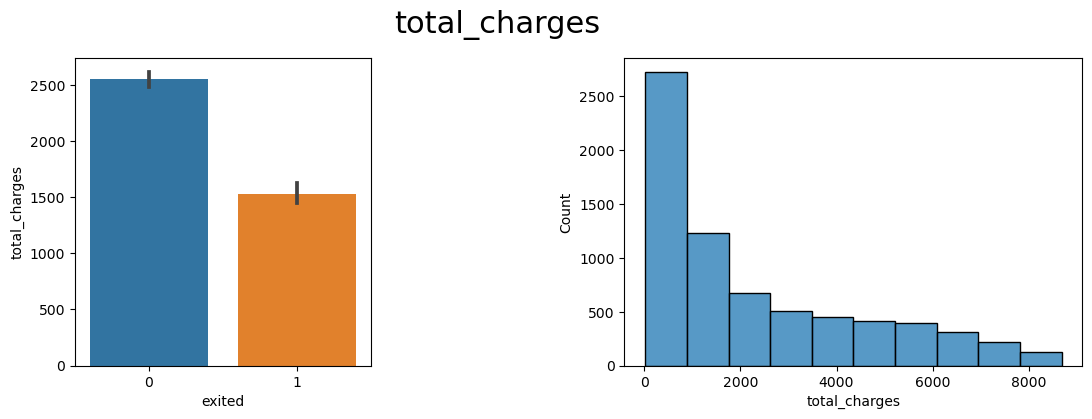

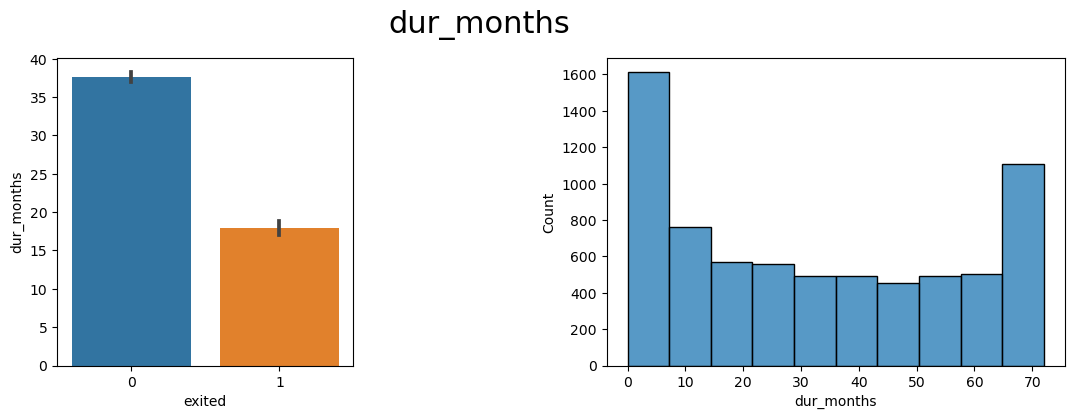

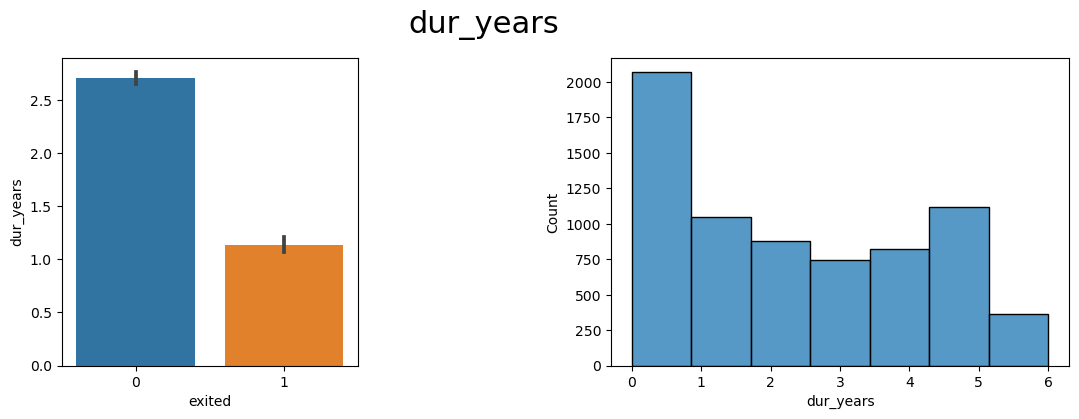

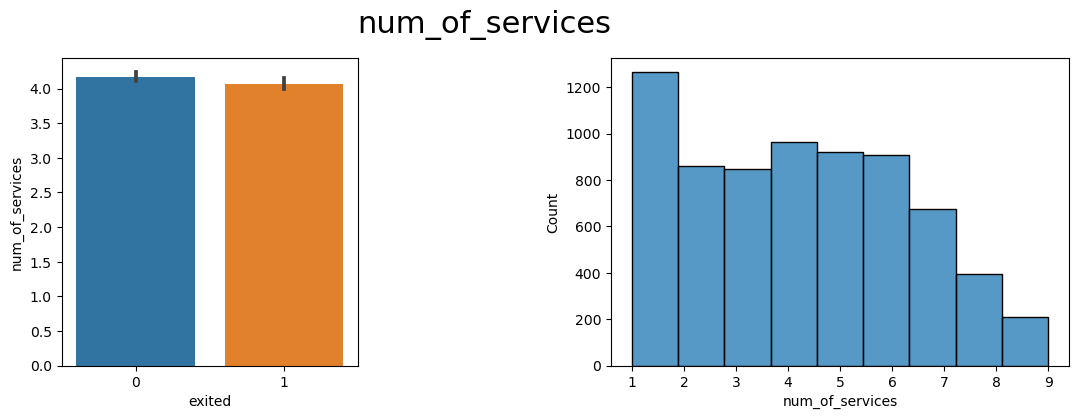

In [43]:
dist_visualizer(features.columns)

### Выводы по распределению признаков

* По половому признаку клиенты распределены равномерно. распределение целевого признака по половой принадлежности так же равномерно
* Клиенты пенсионного возраста уходят значительно чаще, но их всего 16 процентов. 
* По семейному положению распределение равномерное. Среди не состоящих в браке  процент ушедших больше, чем среди состоящих
* Клиентов с иждевенцами 30 процентов и они уходят реже
* Половина клиентов платит за услуги помесячно, более половины из них уходит. Чем выше срок абонентской платы, тем ниже процент уходящих клиентов
* более стабильны клиенты предпочитающие бумажные чеки их 40 процентов от выборки
* по способу оплаты перевешивают клиенты предпочитающие электронные платежи они же и уходят чаще других
* по наличию нескольких телефонных линий не видно примечательных закономерностей
* клиенты с оптоволоконным кабелем уходят значительно чаще, чем с цифровой абонентской линией, а реже всего уходят те, кто не пользуется интернетом вообще
* У трети клиентов подключена услуга блокировки небезопасных сайтов и уходят они значительно реже прочих (стабильность!)
* В точности такая же ситуация с теми, кто пользуется тех-поддержкой
* С прочимми интернет-услугами ситуация похожа. Те кто ими пользуются уходят реже, кроме стримингового телевидения и каталога фильмов. там ситуация противоположная
* среди ушедших клиентов средняя месячная абонентская плата выше, а среднее значение общих затрат почти в 2 раза ниже
* в среднем человекоактивность оценивается в четверочку из 9) Как среди ушедших, так и среди оставшихся
* Диапазоны значений количественных признаков сильно различаются. Потребуется StandardScaler.


In [44]:
df.head()

,gender,senior_citizen,partner,dependents,payment_type,paperless_billing,payment_method,monthly_charges,total_charges,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,exited,dur_months,dur_years,internet,num_of_services
0,Female,0,Yes,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,DSL,0,1,0,0,0,0,0,1,0,1,2
1,Male,0,No,No,One year,No,Mailed check,56.95,1889.50,One,DSL,1,0,1,0,0,0,0,34,2,1,4
2,Male,0,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,One,DSL,1,1,0,0,0,0,1,2,0,1,4
3,Male,0,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,DSL,1,0,1,1,0,0,0,45,3,1,4
4,Female,0,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,One,Fiber optic,0,0,0,0,0,0,1,2,0,1,2


<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий тимлида <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b> Много графиков, хорошая визуализация. Но не хватает вывода. Что следует из этого пункта анализа? Чем отличаются типовые клиенты разных классов (кто ушел и кто остался)?

<div style="border:solid purple 3px; padding: 2px">
<div class="alert alert-info" markdown="1">

>  <strong><span style="color:purple">Готово!</span></strong>

</div>

<div class="alert alert-success">
<h2> Комментарий тимлида 2<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> теперь супер!

Присутствует дисбаланс классов в большинстве категориальных признаков. Посмотрим на распределение целевого признака

<AxesSubplot:title={'center':'Target Distribution'}, xlabel='exited', ylabel='count'>

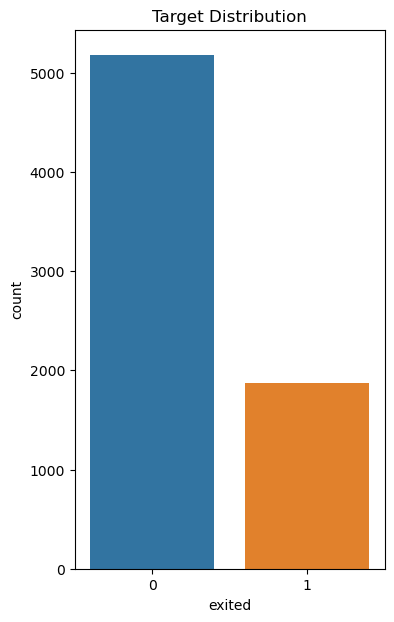

In [45]:
plt.figure(figsize=(4, 7))
plt.title("Target Distribution")
sns.countplot(data=df, x='exited', order =df["exited"].unique() )

Классы целевого признака так же не сбалансированы

В ходе исследования для устранения дисбаланса классов был произведен ресэмплинг при помощи SMOTENC. Влияние на результаты было слабым и неоднозначным, в связи с чем было принято решение не использовать его в окончательном варианте

<div class="alert alert-success">
<h2> Комментарий тимлида <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> хорошо

interval columns not set, guessing: ['senior_citizen', 'monthly_charges', 'total_charges', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'exited', 'dur_months', 'dur_years', 'internet', 'num_of_services']


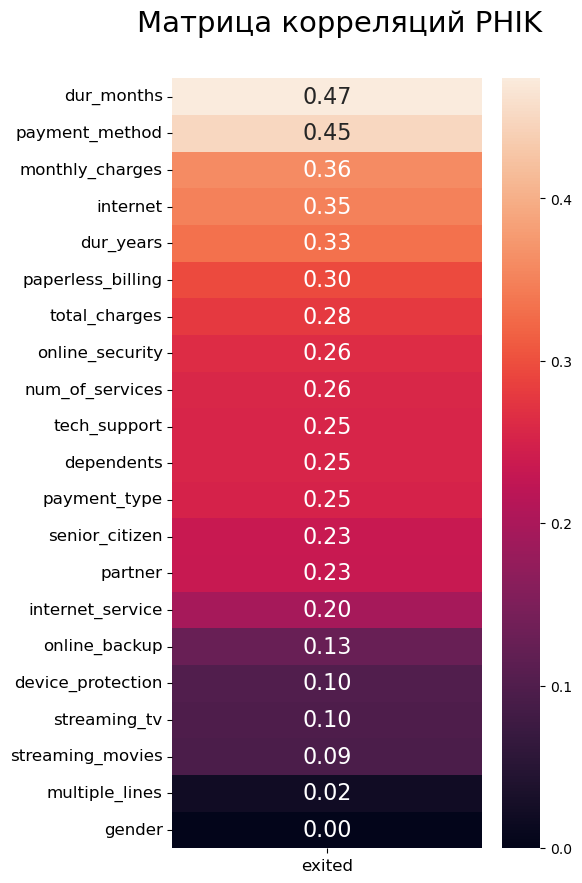

In [46]:
# Определяем индексы нелинейной корреляции и записываем в переменную
corr = df.phik_matrix()
# Визуализируем
plt.figure(figsize=(5,10))
sns.heatmap((corr[["exited"]]
            .drop("exited", axis=0)
            .sort_values(by="exited", ascending=False)), 
            annot=True,
            fmt=".2f",
            annot_kws={'fontsize': 16}
           )
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title('Матрица корреляций PHIK', size=21, x=.54, y=1.05)
plt.show()

наибольшие значения нелинейной корреляции с целевым признаком у признаков длительности пользования услугами, метода оплаты, ежемесячной оплаты и наличия интернет подключения.

<div class="alert alert-success">
<h2> Комментарий тимлида<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>
        
На будущее, полезные ссылки - проверка важности признаков по модели это только один из способов (корреляция в том числе). Используют также аналитические методы проверки гипотез. 

Есть несколько инструментов для отбора признаков, подробнее можно посмотреть в данной статье (Отбор признаков в задачах машинного обучения): https://habr.com/ru/post/550978/

В библиотеке sklearn есть методы mutual_info_regression и mutual_info_classif соответственно для регрессии и классификации.
https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html#sklearn.feature_selection.mutual_info_classif

## Подбор модели

In [47]:
# создаем список для результатов всех моделей
final_list = []
def everything_maker(model_name, model, params, features, target, encoder="ordinal", i_am_cheater=False):
    
    """Функция принимает на вход имя модели, модель, гиперпараметры и обучающие 
    данные, а так же имя кодировщика категориальных данных,производит 
    кроссвалидацию с подбором параметров и возвращает модель и 
    параметры модели с наибольшим значением метрики ROC-AUC"""
    result_list = []    #     список с результатами кроссвалидации
#     разбиваем выборку на трейн и тест
    X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    target, 
                                                    test_size=0.25, 
                                                    random_state=281122, 
                                                    stratify=(target)) #стратификация выборок по целевому признаку
    if encoder == "ohe":
        cat_transformer = OneHotEncoder() # drop="first")
    elif encoder == "ordinal":
        cat_transformer = OrdinalEncoder()   
    else:
        print("Choose transformer!")
        return
#     для количественных признаков используем стандарт скеллер по умолчанию
    num_transformer = StandardScaler()
#     создаем пайплайн для кодирования
    col_transformer = ColumnTransformer(
        [
            ("cat", cat_transformer, categorical),
            ("num", num_transformer, numeric)
        ])
#     создаем пайплайн для грид сёрч
    pl = Pipeline(
        [
            ("transformer", col_transformer),
            ("model", model)
        ])
#     кроссвалидация с подбором параметров
    grid_search = GridSearchCV(pl, params, cv=5, scoring="roc_auc", n_jobs=-1)
    model = grid_search.fit(X_train, y_train)
    best_params = str(model.best_params_)                     # параметры лучшей модели
    best_score = model.best_score_.round(4)                   # значение ROC-AUC для лучшей модели на кроссвалидации
    best_model = model.best_estimator_                        # лучшая модель   
    best_model.fit(X_train, y_train)                          # обучаем модель
    accuracy = best_model.score(X_train, y_train).round(4)    # добавляем к списку результатов значение accuracy 
#     добавляем результаты в таблицу
    result_list.append(model_name)
    result_list.append(best_params)
    result_list.append(encoder)
    result_list.append(best_score)
    result_list.append(accuracy)
#     добавляем таблицу в общуютаблицу
    final_list.append(result_list) 
    print(result_list)
    if i_am_cheater:
        print(f"\nROC-AUC на тесте: {(roc_auc_score(y_test, (best_model[1].predict_proba(best_model[0].transform(X_test))[:, 1]))).round(4)}. подсматривать стыдно!\n")
    return X_test, y_test, best_model

<div class="alert alert-success">
<h2> Комментарий тимлида<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> хорошо! плюс за stratify и пайплайн.
    
P.S.:  i_am_cheater - 👍

### Дерево Решений

In [48]:
tree = DecisionTreeClassifier(random_state=281122, class_weight="balanced")
tree_hyper = {"model__max_depth" : range(1, 20), "model__min_samples_leaf" : range(45, 60)}


In [49]:
%%time
X_test, y_test, best_ord_tree = everything_maker("Decision Tree", tree, tree_hyper, features, target, "ordinal")
X_test, y_test, best_ohe_tree = everything_maker("Decision Tree", tree, tree_hyper, features, target, "ohe")

['Decision Tree', "{'model__max_depth': 6, 'model__min_samples_leaf': 48}", 'ordinal', 0.8189, 0.744]
['Decision Tree', "{'model__max_depth': 8, 'model__min_samples_leaf': 59}", 'ohe', 0.8258, 0.749]
CPU times: total: 6.86 s
Wall time: 21.6 s


### Случайный Лес

In [50]:
forest = RandomForestClassifier(random_state=281122, class_weight="balanced")
forest_hyper = {"model__max_depth": range(1, 15), "model__n_estimators": range(60, 70)}

In [51]:
%%time
X_test, y_test, best_ord_forest = everything_maker("Random Forest", forest, forest_hyper, features, target, "ordinal")
X_test, y_test, best_ohe_forest = everything_maker("Random Forest", forest, forest_hyper, features, target, "ohe")

['Random Forest', "{'model__max_depth': 7, 'model__n_estimators': 67}", 'ordinal', 0.8368, 0.7772]
['Random Forest', "{'model__max_depth': 7, 'model__n_estimators': 62}", 'ohe', 0.8378, 0.7732]
CPU times: total: 10.1 s
Wall time: 1min 8s


### Light GBM

In [52]:
lgbm = LGBMClassifier(random_state=281122, silent=True, class_weight="balanced")
lgbm_hyper = {"model__max_depth": range(1, 10), "model__n_estimators": range(25, 201, 25), "model__learning_rate": [0.05, 0.1]}

In [53]:
%%time
X_test, y_test, best_ord_lgbm = everything_maker("LightGBM", lgbm, lgbm_hyper, features, target, "ordinal")
X_test, y_test, best_ohe_lgbm = everything_maker("LightGBM", lgbm, lgbm_hyper, features, target, "ohe")

['LightGBM', "{'model__learning_rate': 0.1, 'model__max_depth': 2, 'model__n_estimators': 100}", 'ordinal', 0.8388, 0.7463]
['LightGBM', "{'model__learning_rate': 0.1, 'model__max_depth': 2, 'model__n_estimators': 100}", 'ohe', 0.8404, 0.7471]
CPU times: total: 9.17 s
Wall time: 37.8 s


<div class="alert alert-warning">
    <h2> Комментарий тимлида <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b>
       
Для LGBM не требуется масштабирование и кодирование, лучше сделать на незакодированной выборке без масштабирования. Чтобы все получилось достаточно просто изменить тип данных у категориальных признаков на category
    
</div>

<div style="border:solid orange 3px; padding: 2px">
<div class="alert alert-info" markdown="1">

>  <strong><span style="color:orange">Понял. Запомнил. Учел. Обязательно осуществлю, но не сегодня</span></strong>

</div>

### Cat Boost

In [72]:
cat = CatBoostClassifier(random_state=281122, silent=True, auto_class_weights="Balanced") 
cat_hyper = {"model__max_depth": range(1, 5), "model__iterations": range(156, 190, 3), "model__learning_rate": [0.04, 0.05, 0.06, 0.07, 0.08]}

In [73]:
%%time
X_test, y_test, best_ord_cat = everything_maker("CatBoost", cat, cat_hyper, features, target, "ordinal")
X_test, y_test, best_ohe_cat = everything_maker("CatBoost", cat, cat_hyper, features, target, "ohe")

['CatBoost', "{'model__iterations': 186, 'model__learning_rate': 0.04, 'model__max_depth': 4}", 'ordinal', 0.8412, 0.7438]
['CatBoost', "{'model__iterations': 177, 'model__learning_rate': 0.06, 'model__max_depth': 2}", 'ohe', 0.8414, 0.7378]
CPU times: total: 20.1 s
Wall time: 3min 30s


<div class="alert alert-warning">
    <h2> Комментарий тимлида <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b>
     
CatBoost также умеет работать с категориальными незакодированными признаками и использовать закодированные с ним не рекомендуется. Что бы все заработало надо передат в модель список названий категориальных признаков

<div style="border:solid orange 3px; padding: 2px">
<div class="alert alert-info" markdown="1">

>  <strong><span style="color:orange">Это знал. Пробовал, и сколько пробовал, столько результат не особо отличался от ординал. может нужен какой-то особый расклад. ну в общем перестал использовать, ибо проще все под одну гребенку. каггрицца, а если нет разницы, зачем печатать больше? Хотелось бы узнать, что по этому поводу думаешь. катбуст вообще мутный очень)</span></strong>

</div>

<div class="alert alert-success">
<h2> Комментарий тимлида 2<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> У Catboosta встроенный кодировщик, суть которого чем то похожа на TaregtEncoder, то есть оно основано на целевой вероятности для заданного значения, при этом для каждой строки целевая вероятность вычисляется только по предыдущим строкам. Если подробнее, с формулами и примерами, то можно почитать здесь <a href='https://catboost.ai/en/docs/concepts/algorithm-main-stages_cat-to-numberic'>из офиц. документации</a>.
        
То есть различие встроенного кодировщика и OrdinalEncoder значительные. На метрику не влияет тк категориальные фичи у нас не очень значимые в этой задаче, но в целом бывают задачи, где есть ощутимая разница :)
        
        
Согласна, что Catboost не кристально понятный алгоритм, но разобраться в нем стоит - он один из наиболее популрных. Ниже ссылки с хорошими статьями.
        
<a href='https://habr.com/ru/company/ods/blog/645887/'>много, но если долистать до CatBoost, то описан алгоритм</a>,
        
<a href='https://www.youtube.com/watch?v=ZNJ3lKyI-EY'>Урок по градиентному бустингу от Глеба Михайлова</a>,
        
<a href='https://alexanderdyakonov.files.wordpress.com/2017/06/book_boosting_pdf.pdf'>методичка по гиперпараметрам</a>,
        
<a href='https://academy.yandex.ru/handbook/ml/article/gradientnyj-busting'>хорошая свежая статья про градиентный бустинг</a>.
</div></div>

### Логистическая Регрессия

In [56]:
log_reg = LogisticRegression(random_state=281122, class_weight="balanced")
lr_hyper = {"model__penalty": ['l1', 'l2', 'elasticnet'],
                "model__tol": [0.01, 0.001, 0.0001, 0.00001, 0.000001, 0.0000001],
                "model__max_iter": [10, 25, 50, 100, 200],
                "model__solver": ["liblinear"]}

In [57]:
%%time
X_test, y_test, best_ohe_log_reg = everything_maker("Logistic Regression", log_reg, lr_hyper, features, target, "ohe")

['Logistic Regression', "{'model__max_iter': 25, 'model__penalty': 'l1', 'model__solver': 'liblinear', 'model__tol': 1e-06}", 'ohe', 0.834, 0.7416]
CPU times: total: 1.95 s
Wall time: 6.84 s


<div class="alert alert-block alert-danger">
<h2> Комментарий тимлида <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b>
    
Для логистической регрессии нужно выполнить кодирование способом OHE, т.к. порядковое кодирование не подходит для этой модели.
    
Поэтому давай уберем ненужную строчку кода.
    

<div style="border:solid purple 3px; padding: 2px">
<div class="alert alert-info" markdown="1">

>  <strong><span style="color:purple">Опять сделяль</span></strong>

</div>

<div class="alert alert-success">
<h2> Комментарий тимлида 2<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> принято

In [58]:
finl = pd.DataFrame(final_list, columns=("model_name", "model_hyperparameters", "encoder", "roc_auc_score", "train_accuracy"))

finl.sort_values("roc_auc_score", ascending=False)

,model_name,model_hyperparameters,encoder,roc_auc_score,train_accuracy
7,CatBoost,"{'model__iterations': 177, 'model__learning_rate': 0.07, 'model__max_depth': 2}",ohe,0.8418,0.7418
6,CatBoost,"{'model__iterations': 171, 'model__learning_rate': 0.05, 'model__max_depth': 4}",ordinal,0.8415,0.7560
5,LightGBM,"{'model__learning_rate': 0.1, 'model__max_depth': 2, 'model__n_estimators': 100}",ohe,0.8404,0.7471
4,LightGBM,"{'model__learning_rate': 0.1, 'model__max_depth': 2, 'model__n_estimators': 100}",ordinal,0.8388,0.7463
3,Random Forest,"{'model__max_depth': 7, 'model__n_estimators': 62}",ohe,0.8378,0.7732
2,Random Forest,"{'model__max_depth': 7, 'model__n_estimators': 67}",ordinal,0.8368,0.7772
8,Logistic Regression,"{'model__max_iter': 25, 'model__penalty': 'l1', 'model__solver': 'liblinear', 'model__tol': 1e-06}",ohe,0.8340,0.7416
1,Decision Tree,"{'model__max_depth': 8, 'model__min_samples_leaf': 59}",ohe,0.8258,0.7490
0,Decision Tree,"{'model__max_depth': 6, 'model__min_samples_leaf': 48}",ordinal,0.8189,0.7440


лучшие результаты у катбуста с обоими типами кодировки результаты почти идентичны
Посмотрим на важность вклада каждого признака в предсказание лучшей модели

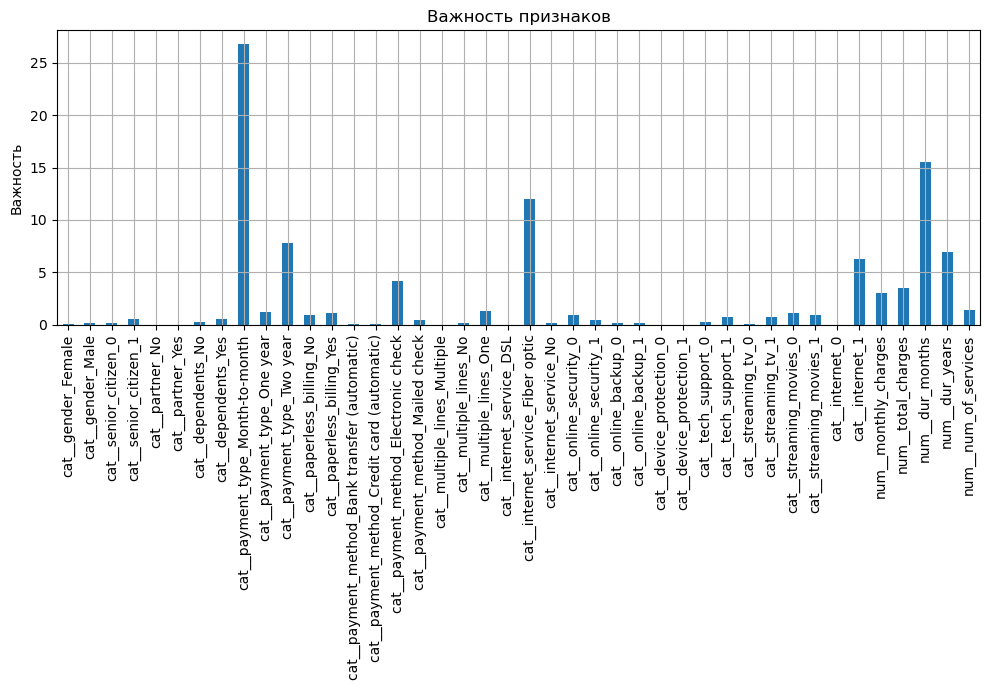

In [59]:
importance = pd.Series(best_ohe_cat[1].feature_importances_,
                       best_ohe_cat[0].get_feature_names_out())

fig, ax = plt.subplots(figsize=(10,7))
importance.plot.bar(ax=ax)
ax.set_title("Важность признаков")
ax.set_ylabel('Важность')
fig.tight_layout()
plt.grid()
plt.show()

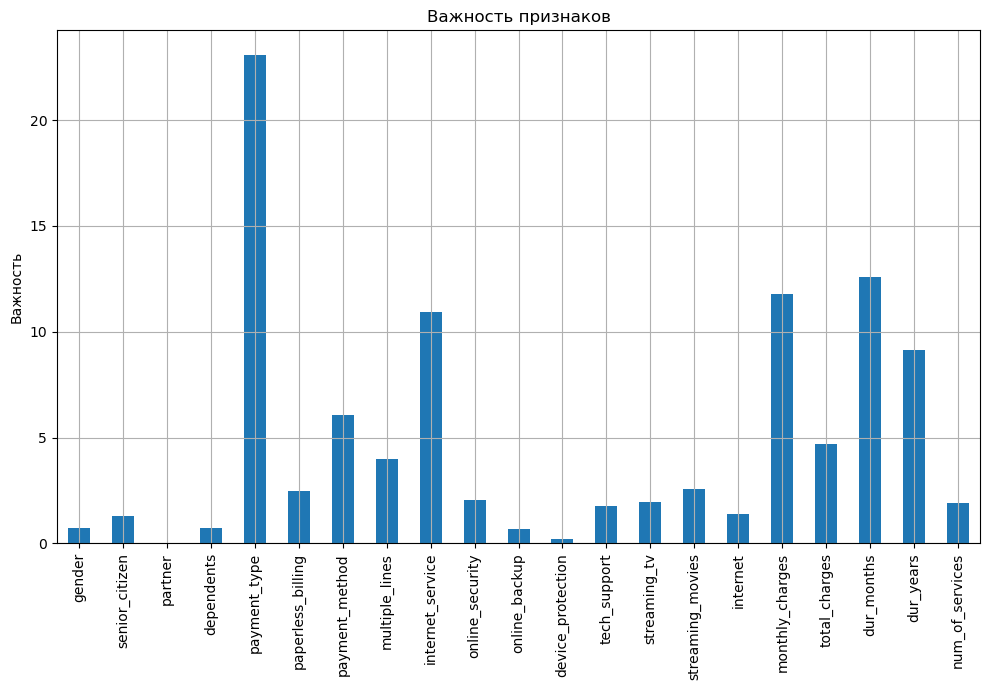

In [60]:
importance = pd.Series(best_ord_cat[1].feature_importances_,
                       features.columns)

fig, ax = plt.subplots(figsize=(10,7))
importance.plot.bar(ax=ax)
ax.set_title("Важность признаков")
ax.set_ylabel('Важность')
fig.tight_layout()
plt.grid()
plt.show()

наибольший вклад в предсказания внесли признаки связанные с длительностью пользования услугами и тип оплаты. попробуем удалить признаки, внесшие наименьший вклад, и посмотрим на качество модели на валидации

In [61]:
categorical = [
    "senior_citizen",
    "payment_type",
    "paperless_billing",
    "payment_method",
    "multiple_lines",
    "internet_service",
    "online_security",
    "tech_support",
    "streaming_tv",
    "streaming_movies",
    "internet"
]
numeric = [
    'monthly_charges',
    'total_charges',
    'dur_months',
    'dur_years',
    'num_of_services'
]
droped_features=features[categorical+numeric]

<div class="alert alert-success">
<h2> Комментарий тимлида<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> отличное решение

### CatBoost без части признаков

In [62]:
%%time
drop_X_test, drop_y_test, best_droped_ord_cat = everything_maker("CatBoost", cat, cat_hyper, droped_features, target, "ordinal")
drop_X_test, drop_y_test, best_droped_ohe_cat = everything_maker("CatBoost", cat, cat_hyper, droped_features, target, "ohe")

['CatBoost', "{'model__iterations': 186, 'model__learning_rate': 0.04, 'model__max_depth': 4}", 'ordinal', 0.8412, 0.7438]
['CatBoost', "{'model__iterations': 177, 'model__learning_rate': 0.05, 'model__max_depth': 3}", 'ohe', 0.8413, 0.7444]
CPU times: total: 16.5 s
Wall time: 2min 53s


метрики остались практически без изменений. время работы так же сократилось незначительно. оставим первоначальный вариант

## Тестирование лучшей модели

In [63]:
# ставниваем тестовую выборку до и после кодирования
display(X_test.head())
X_testt = best_ord_cat[0].transform(X_test)
pd.DataFrame(X_testt, columns=features.columns).head()

,gender,senior_citizen,partner,dependents,payment_type,paperless_billing,payment_method,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,internet,monthly_charges,total_charges,dur_months,dur_years,num_of_services
1558,Female,0,No,No,Month-to-month,Yes,Credit card (automatic),Multiple,Fiber optic,0,1,1,0,0,1,1,95.60,1555.65,16,1,6
3020,Male,0,No,Yes,One year,No,Credit card (automatic),No,DSL,1,0,0,1,0,0,1,34.05,1113.95,33,2,3
3845,Male,0,No,No,Month-to-month,Yes,Electronic check,One,Fiber optic,0,0,1,0,0,0,1,73.90,280.85,4,0,3
423,Male,0,Yes,Yes,One year,No,Mailed check,Multiple,No,0,0,0,0,0,0,0,25.70,1110.50,44,3,2
95,Female,0,No,No,Month-to-month,Yes,Electronic check,Multiple,Fiber optic,1,0,0,0,0,0,1,78.95,927.35,12,1,4


,gender,senior_citizen,partner,dependents,payment_type,paperless_billing,payment_method,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,internet,monthly_charges,total_charges,dur_months,dur_years,num_of_services
0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.020408,-0.322352,-0.664589,-0.634530,0.800923
1,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,-1.031360,-0.517188,0.028610,-0.138146,-0.498896
2,1.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.297039,-0.884674,-1.153907,-1.130915,-0.498896
3,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.309707,-0.518710,0.477151,0.358239,-0.932168
4,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.465381,-0.599499,-0.827695,-0.634530,-0.065623


кодирование прошло корректно

In [64]:
# вероятности предсказания положительного класса для каждого значения целевого признака на тестовой выборке
pos_pred = best_ord_cat[1].predict_proba(X_testt)[:, 1]
pos_pred
# Выводим значения ROC-AUC
print('ROC-AUC лучшей модели на тестовой выборке:', roc_auc_score(y_test, pos_pred).round(4))

ROC-AUC лучшей модели на тестовой выборке: 0.8733


<div class="alert alert-success">
<h2> Комментарий тимлида<a class="tocSkip"> </h2>

<b>Все отлично!👍</b>

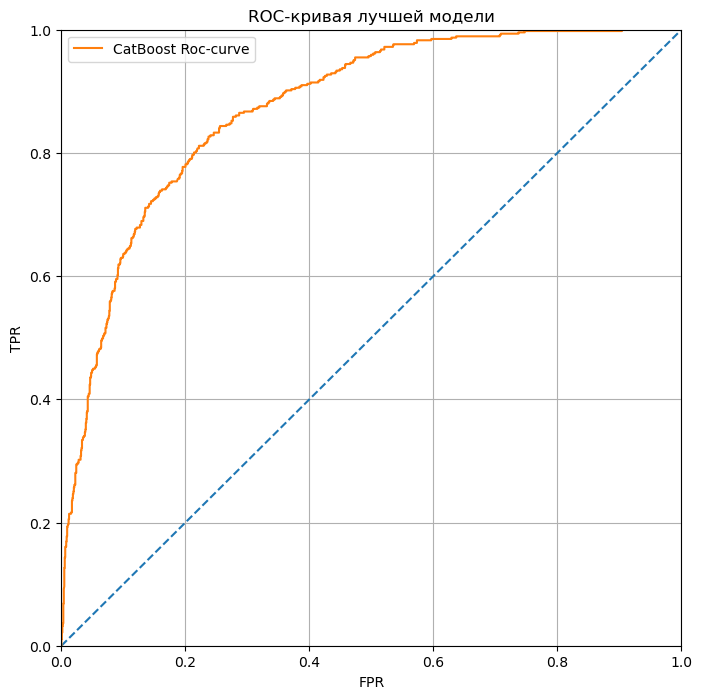

In [65]:
# визуализируем ROC-кривую
plt.figure(figsize=(8, 8))
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.title('ROC-кривая лучшей модели')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.grid()
plt.plot([0, 1], [0, 1], linestyle='--')
fpr, tpr, thresholds = roc_curve(y_test, pos_pred)
plt.plot(fpr, tpr, label='CatBoost Roc-curve')
plt.legend()
plt.show()

Посмотрим на значения точности, полноты и Ф1-меры на разных порогах классификации

In [66]:
for threshold in np.arange(0, 1, 0.1):
    predicted = pos_pred > threshold
    precision = precision_score(y_test, predicted)
    recall = recall_score(y_test, predicted)
    f1 = f1_score(y_test, predicted)


    print("threshold = {:.2f} | precision = {:.3f}, recall = {:.3f}, F1 = {:.3f}".format(
        threshold, precision, recall, f1))

threshold = 0.00 | precision = 0.265, recall = 1.000, F1 = 0.419
threshold = 0.10 | precision = 0.350, recall = 0.989, F1 = 0.517
threshold = 0.20 | precision = 0.396, recall = 0.972, F1 = 0.563
threshold = 0.30 | precision = 0.433, recall = 0.929, F1 = 0.591
threshold = 0.40 | precision = 0.479, recall = 0.889, F1 = 0.622
threshold = 0.50 | precision = 0.543, recall = 0.833, F1 = 0.658
threshold = 0.60 | precision = 0.618, recall = 0.741, F1 = 0.674
threshold = 0.70 | precision = 0.706, recall = 0.595, F1 = 0.646
threshold = 0.80 | precision = 0.765, recall = 0.362, F1 = 0.491
threshold = 0.90 | precision = 0.887, recall = 0.101, F1 = 0.181


лучшее значение Ф1 на пороге 0.5, это потому, что мы сбалансировали веса классов при обучении модели

In [67]:
predictions = best_ord_cat[1].predict(X_testt)
acc = accuracy_score(y_test, predictions)
print(f"Значение accuracy лучшей модели на тестовой выборке: {acc}")

Значение accuracy лучшей модели на тестовой выборке: 0.7700170357751278


In [68]:
# матрица ошибок
cm = confusion_matrix(y_test, predictions)
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
tn, fp, fn, tp

(967, 327, 78, 389)

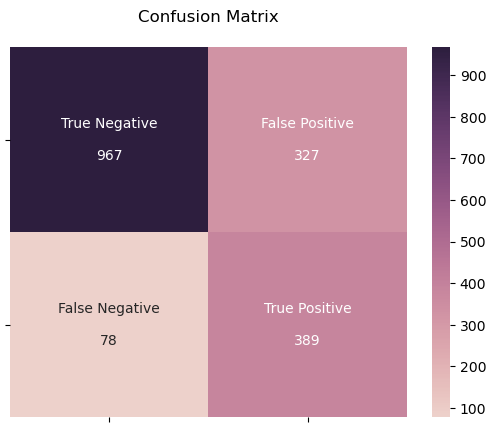

In [69]:
# визуализируем
cm_named = np.core.defchararray.add(np.array([["True Negative\n\n", "False Positive\n\n"], 
                                              ["False Negative\n\n", "True Positive\n\n"]]), cm.astype(str))
fig, ax = plt.subplots()
ax = sns.heatmap(cm, annot=cm_named, fmt="", cmap=sns.cubehelix_palette(as_cmap=True))
ax.set(xticklabels=[]) 
ax.set(yticklabels=[]) 
ax.set_title("Confusion Matrix\n")
plt.show()

## ВЫВОД

Получилась очень красивая матрица ошибок

<div class="alert alert-success">
<h2> Комментарий тимлида<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> согласна:) Хороший и подробный анализ рещультатов и работа с финальной моделью, молодец!

<div style="border:solid Chocolate 2px; padding: 40px"><h2>✔️ Заключение тимлида: <a class="tocSkip"> </h2> 
    
<b>Павел</b>, было приятно проверять твою работу, она почти готова, ты молодец! 
    
Очень хорашя, подробная работа, осталось немного отшлифовать:)
    
Нужно все импорты поднять наверх, добавить вывод по анализу и убрать порядкое кодирование из логистической регрессии.
    

 
    
Если есть какие-то трудности, или нужны пояснения по проекту — смело пиши! Я постараюсь тебе помочь 😊

Жду твоего ответа!
    
</font>

<div style="border:solid Chocolate 2px; padding: 40px"><h2>✔️ Заключение тимлида: <a class="tocSkip"> </h2> 
    
<b>Павел</b>, доработки приняты, по метрике ты получаешь 6 sp, поздравляю! Можно приступать к отчету

## Отчет

# $$ Отток\ клиентов\ телеком\ компании  $$

### **Цель исследования:**  
Изучить информацию о пользователях телеком компании. Построить модель для прогноза оттока клиентов. Разобраться в факторах и причинах прекращения пользования услугами компании

### **Знакомство с данными**  
В нашем распоряжении было 4 таблицы:  
* С персональными данными клиентов (7043 строки),  
* с характеристиками их контрактов (7043 строки), 
* с характеристиками интернет подключения и подключенных услуг (5517 строк),
* с информацией о подключении услуги нескольких телефонных линий (6361 строка)  

Проверка уникальных ID в таблицах с с большим количеством строк подтвердила, что они совпадают, а в остальных таблицах отсутствие данных связано с отсутствием у того или иного клиента телефонного или интернет подключения. Пропуски и дубликаты не были обнаружены.

### **Анализ и предобработка**
* Данные 4 таблиц были объединены в одну путем присоединения меньших к большим без потери данных в результате образовались пропуски.
* Из столбца с датой ухода $end\_date$ был сгенерирован целевой признак $exited$
* Встолбцах $begin\_date$ и $end\_date$ данные были приведены к типу $datetime$ для того, чтобы сгенерировать признаки длительности пользования услугами
* Так же был изменен тип данных в столбце с общими тратами клиентов $total\_charges$, в результате чего обнаружились пропуски в этом столбце, связянные с тем, что клиенты подключились в текущем месяце, они были заполнены данными из столбца с суммой помесячной платы $monthly\_charges$
* Далее были сгенерированы признаки длительность пользования услугами в  полных годах и в месяцах $dur\_years$ и $dur\_months$
* Пропуски в столбцах с бинарными признаками подключенных интернет услуг $online\_security$, $online\_backup$, $device\_protection$, $tech\_support$, $streaming\_tv$, $streaming\_movies$ были заполнены значением $No$ и приведены к целочисленному типу данных
* Пропуски в столбце с типом интернет подключения $internet\_service$ были заполнены новым уникальным значением означающим отсутствие подключения $No$
* В столбце с информацией о наличии нескольких телефонных линий были полностью заменены значения на $Multiple$, $One$, и $No$, таким образом образовалось 3 группы: несколько линий, одна линия и отсутствие подключения
* Затем исходя из предположения, что наличие/отсутствие интернета может играть значительно большую роль нежели тип подключения был создан бинарный признак $internet$ с информацией о наличии/отсутствии интернет подключения
* Так же был создан признак с общим рейтингом активности использования услуг интернета и телефонии $num\_of\_services$
* Далее были удалены не несущий предсказательного смысла признак $customer\_id$ и  признаки способные спровоцировать утечку целевого признака $begin\_date$ и $end\_date$
* В завершении этапа исслледовательского анализа были проанализированы распределения признаков и распределения в разбивке по классам целевого признака, так же проанализирована нелинейная корреляция с целевым признаком при помощи библищтеки $Phik$


### **Подбор модели**
* Была выполнена кросс-валидация с подбором гиперпараметров на выборке из всех имеющихся признаков. Кадегориальные признаки были закодированы двумя способами прямым с помощью $OneHotEncoder$ и порядковым кодированием с помощью $OrdinalEncoder$, количественные признаки были масщтабированы с помощью $StandardScaler$, в связи с большой разницей в диапазонах величин
* Кроссвалидация выполнялась для 5 моделей $DecisionTreeClassifier$, $RandomForestClassifier$, $LightGBMClassifier$, $CatBoostClassifier$ и $LogisticRegression$.
* Лучшие результаты показала модель $CatBoostClassifier$ с порядковой кодировкой и гиперпараметрами: ***'iterations': 212, 'learning_rate': 0.1, 'max_depth': 2'***

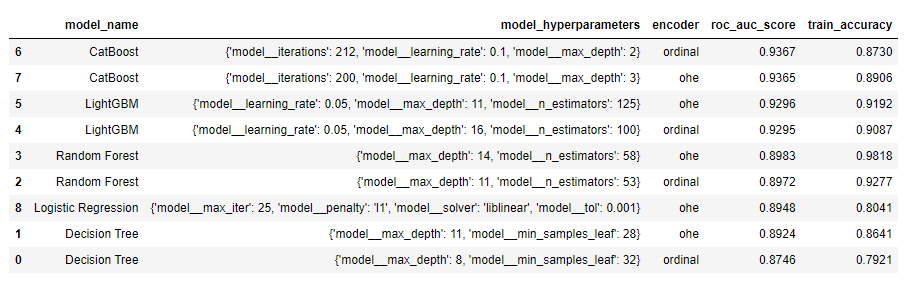

* Для лучшей модели был произведен анализ важности вклада признаков в предсказание 

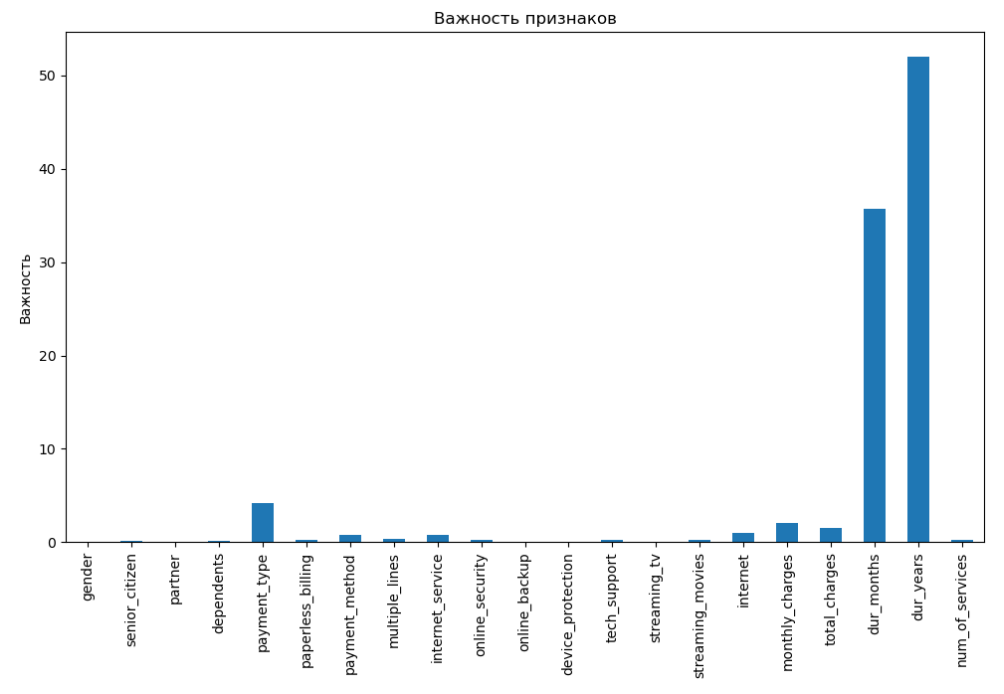

* Затем в целях оптимизации были удалены малозначимые признаки и проведена контрольная кросс-валидация. В результате показатель целевой метрики незначительно упал, а время обучения сократилось так же незначительно и было принято решение оставить все признаки 

### **Проверка лучшей модели**
* Была выполнена проверка лучшей модели на тестовой выборке. Итоговое значение целевой метрики $ROC-AUC:\ 0.9426$, значение точности ($accuracy$)$:\ 0.8734$

* **Какие пункты плана были выполнены, а какие — нет (поясните почему)?**
 + В конечную версию проекта не вошел этап кросс-валидации с ресемплингом с помощью $SMOTENC$. Это связано с тем, что он не имеет метода transform, в связи с чем не подходит для пайплайна(если конечно я правильно понял мысль, которую юпитер пытался до меня донести). Поэтому ресемплинг был сделан перед пайплайном, что дало переобучение на тренировочных данных и как результат более низкий скор на тестовых

* **Какие трудности возникли и как вы их преодолели?**
 + Трудностей связанных с данными не возникало (было немало трудностей связанных с тем, что я не обладал навыками в использовании ряда интсрументов.) эти трудности были преодолены частично с помощью консультаций с тимлидом, за что ей спасибо, частично с помощью рекомендаций одногрупников, за что спасибо им, ну и конечно в основном благодаря тяжкому, упорному, бескомпромисному труду меня любимого)  


* **Какие ключевые шаги в решении задачи выделили?**
 + Задача была достаточно простой. Самым сложным был ликбез среди населения моей квартиры. Это был ключевой шаг.  


* **Какая ваша итоговая модель и какое у неё качество?**  
 
```python

CatBoostClassifier(random_state=281122, silent=True, 
                   auto_class_weights="Balanced", 
                   max_depth=2, 
                   learning_rate=0.1, 
                   iteraations=212)



ROC-AUC: 0.9426

```